<a href="https://colab.research.google.com/github/cristinarainich/Sternberg_analysis/blob/main/Models%20Environmental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

Updated on 14/06/2023 16:24

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import pylab as pl
import seaborn as sns
import re
from scipy import stats
import scipy.io
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.formula.api import glm
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
sns.set()

#Uploading data

In [6]:
working_path = Path('/content/gdrive/MyDrive/CoganLab/Environmental')

In [13]:
!ls /content/gdrive/MyDrive/CoganLab/Environmental

 D29_Block_1_TrialData.mat	  D85_Block_1_TrialData.mat
 D64_Block_1_TrialData.mat	  D86_Block_1_TrialData.mat
 D65_Block_1_TrialData_1.mat	  D87_Block_1_TrialData.mat
 D65_Block_1_TrialData.mat	  eeg_envir.csv
'D71_Block_1_TrialData (1).mat'   eeg_envir_processed.csv
'D73_Block_1_TrialData (2).mat'   Environmental_Subject.mat
'D77_Block_1_TrialData (1).mat'   healthy
 D80_Block_1_TrialData.mat	  ieeg_envir.csv
 D81_Block_1_TrialData.mat	  ieeg_envir_processed.csv
 D84_Block_1_TrialData.mat	  stimuli


In [16]:
eeg = pd.read_csv(
    working_path.joinpath('eeg_envir_processed.csv'),
    index_col=None
)
ieeg = pd.read_csv(
    working_path.joinpath('ieeg_envir_processed.csv'),
    index_col=None
)

In [17]:
# checking significance with ttests
def ttest(x, y):
  if len(x) == len(y):
    return stats.ttest_ind(x, y, equal_var = True)
  else:
    return stats.ttest_ind(x, y, equal_var = False)

# Additional graphs

In [ ]:
eeg.head()

,Unnamed: 0,block,StimulusCategory,ReactionTime,Resp,RespCorrect,stimulusSounds_idx,ProbeCategory,probeSound_idx,Trial,...,stimulusSounds_name,probeSound_name,Length,Words,Nonwords,Environment,ProbeFreq,ProbeImag,StimFreq,StimImag
0,0,1,nonwords,1.160933,No,1,"[58, 67, 65]",0,72,0,...,"['kaagaht', 'tehsahf', 'shahnahl']",zerlaht,3,0,1,0,NaN,NaN,NaN,NaN
1,1,1,environment,0.962195,Yes,1,"[23, 15, 9]",1,23,1,...,"['writing_on_paper', 'school_bell', 'door_knoc...",writing_on_paper,3,0,0,1,NaN,NaN,NaN,NaN
2,2,1,words,0.847072,Yes,1,"[31, 46, 48]",1,31,2,...,"['cushion', 'tunic', 'vision']",cushion,3,1,0,0,2.16,6.1,"[2.16, 0.55, 23.88]","[6.1, 5.6, 5.2]"
3,3,1,nonwords,1.023422,Yes,1,"[62, 55, 51, 59, 64, 67, 70]",1,67,3,...,"['puwgahl', 'haasahp', 'drahjer', 'mahtern', '...",tehsahf,7,0,1,0,NaN,NaN,NaN,NaN
4,4,1,nonwords,1.607325,Yes,1,"[56, 68, 69]",1,68,4,...,"['hermahk', 'thowster', 'viylahs']",thowster,3,0,1,0,NaN,NaN,NaN,NaN


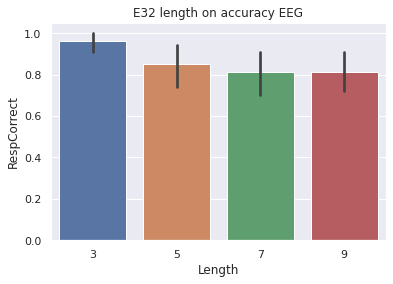

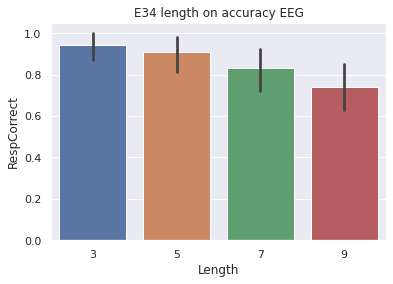

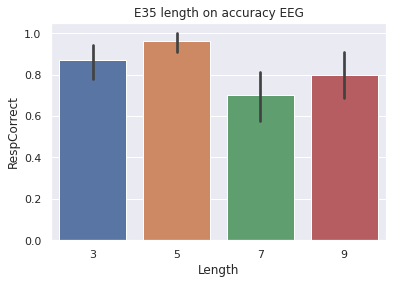

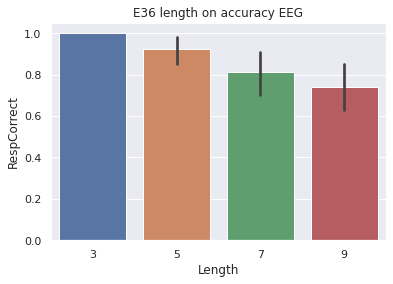

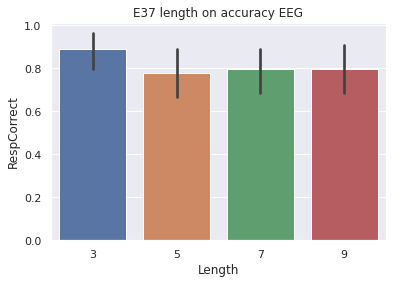

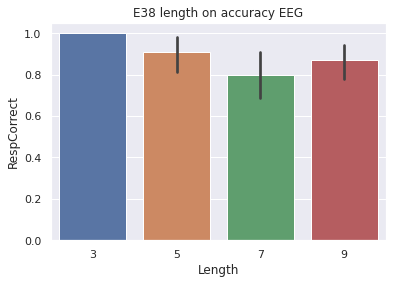

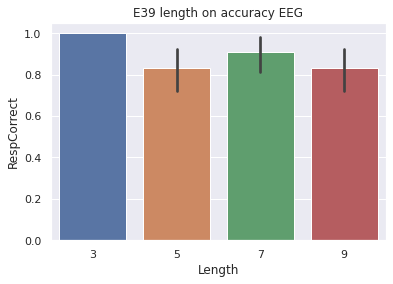

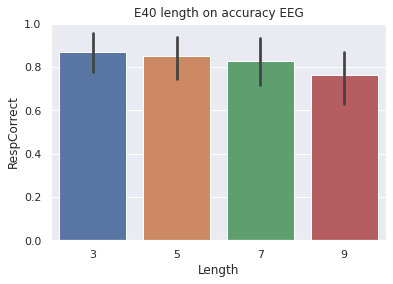

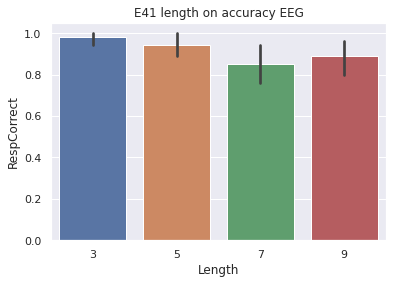

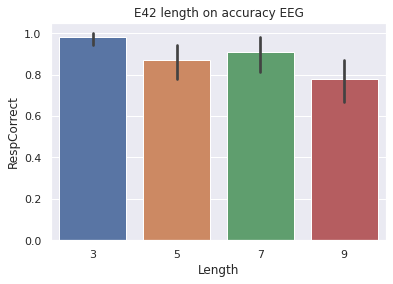

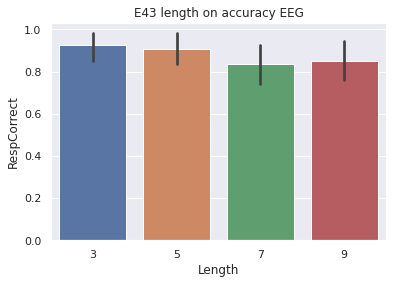

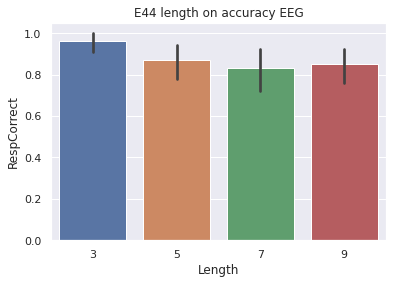

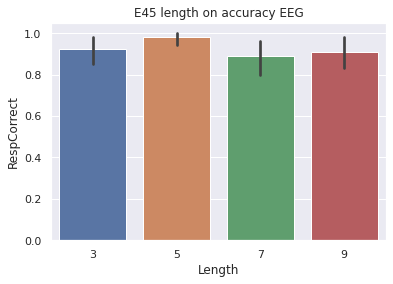

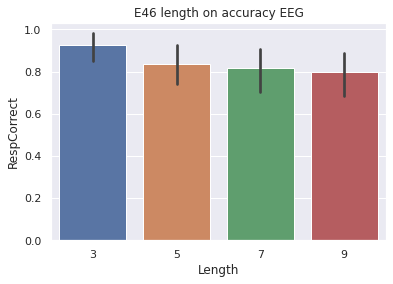

In [ ]:
for i in eeg.Subject.unique():
  subset = eeg[eeg['Subject'] == i]
  pl.figure()
  sns.barplot(x='Length', y='RespCorrect', data=subset)
  pl.title(i + ' length on accuracy EEG')

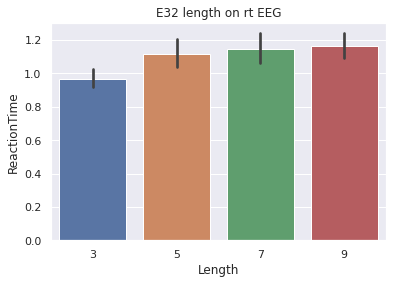

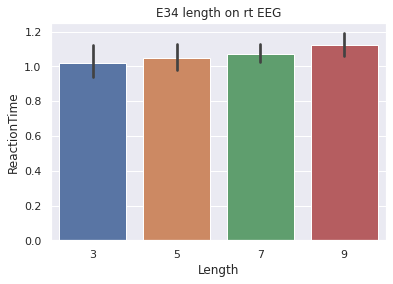

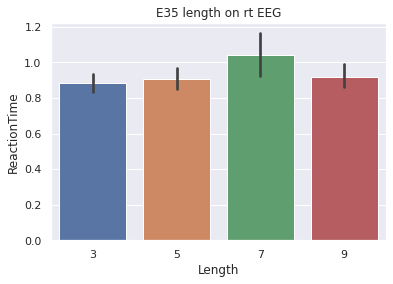

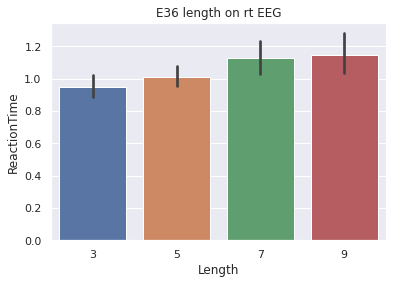

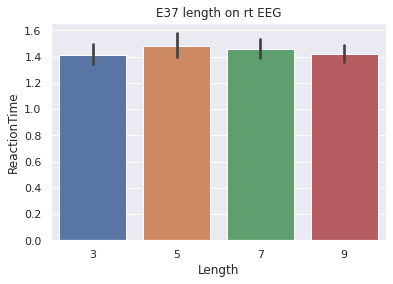

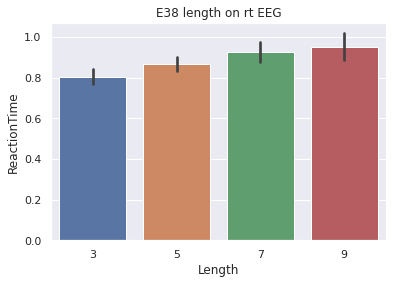

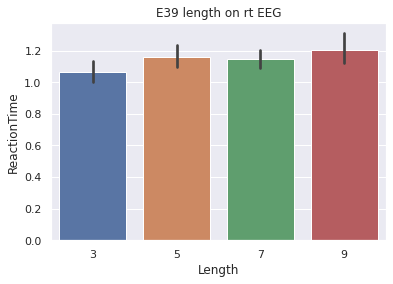

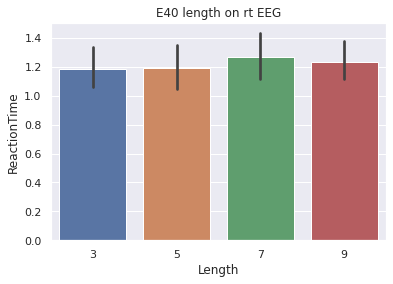

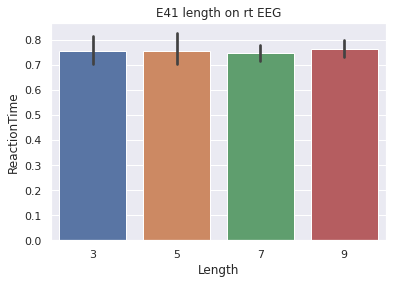

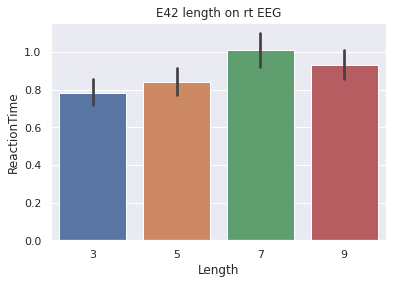

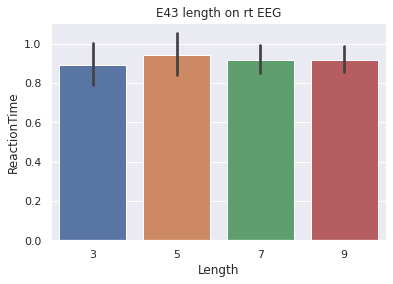

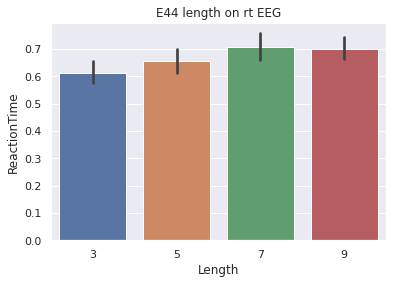

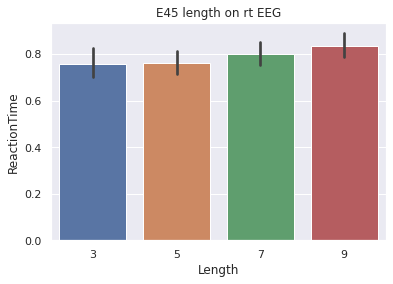

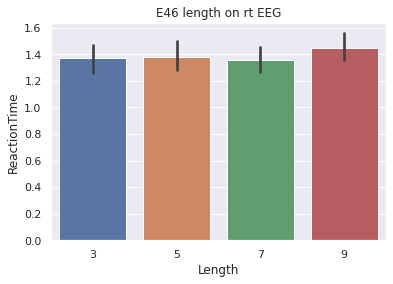

In [ ]:
for i in eeg.Subject.unique():
  subset = eeg[eeg['Subject'] == i]
  pl.figure()
  sns.barplot(x='Length', y='ReactionTime', data=subset)
  pl.title(i + ' length on rt EEG')

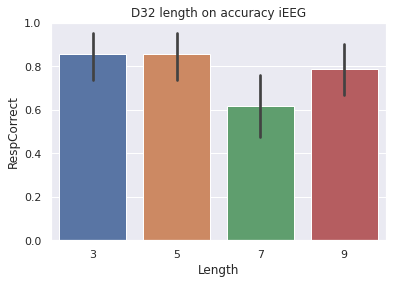

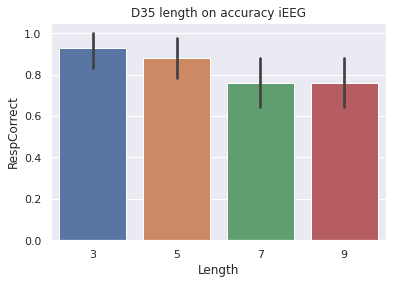

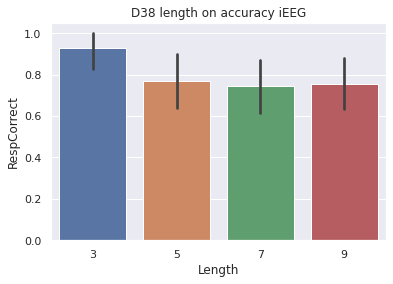

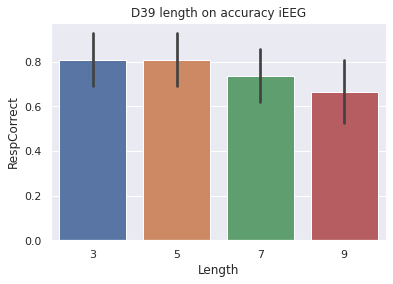

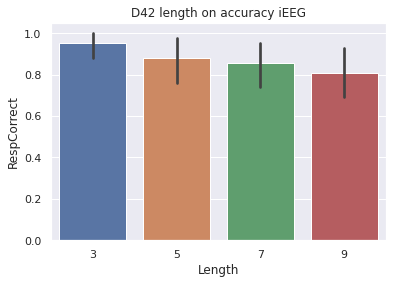

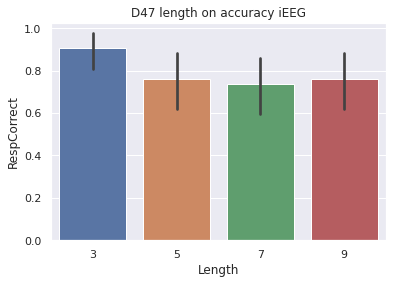

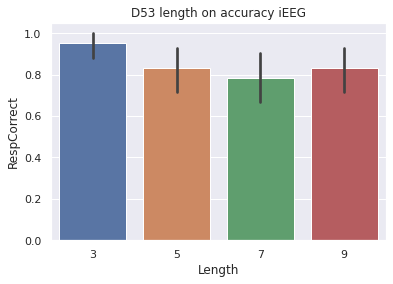

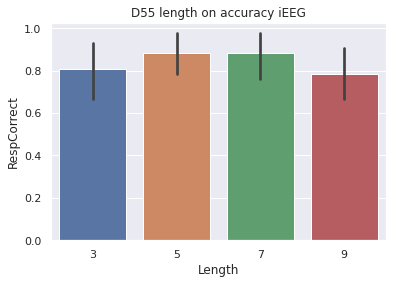

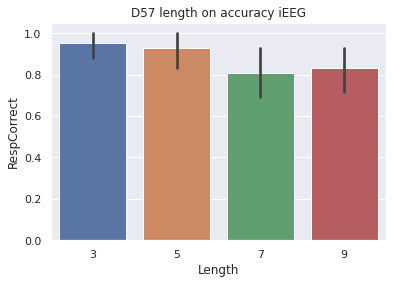

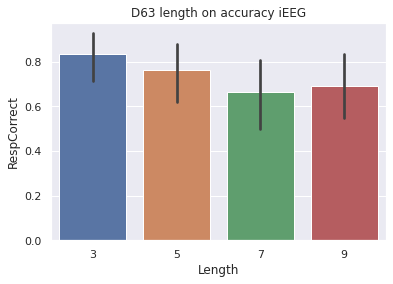

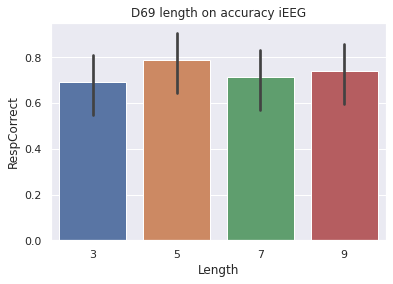

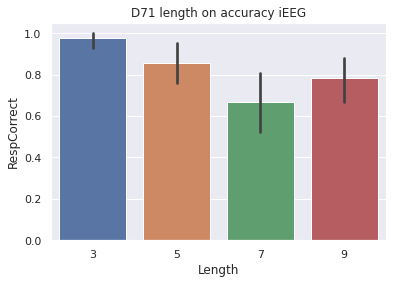

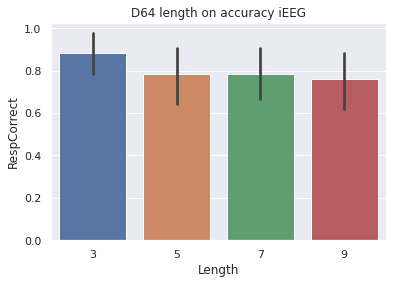

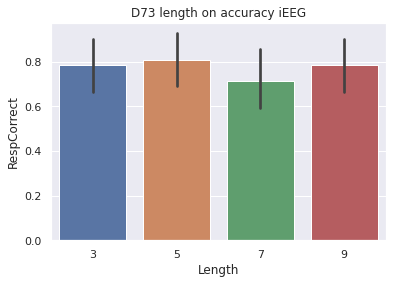

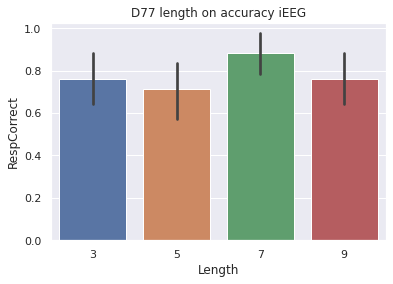

In [ ]:
for i in ieeg.Subject.unique():
  subset = ieeg[ieeg['Subject'] == i]
  pl.figure()
  sns.barplot(x='Length', y='RespCorrect', data=subset)
  pl.title(i + ' length on accuracy iEEG')

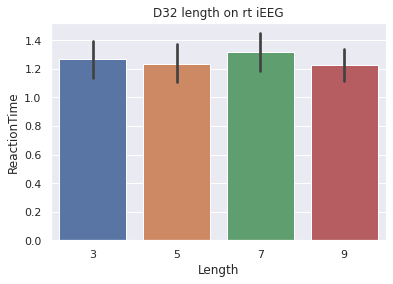

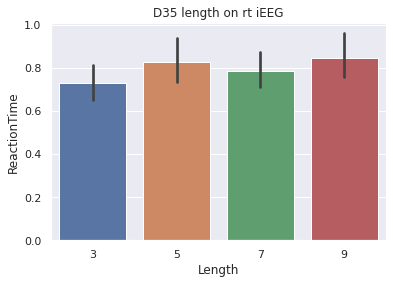

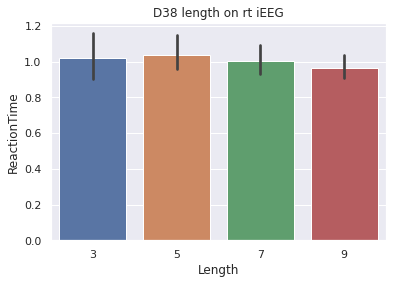

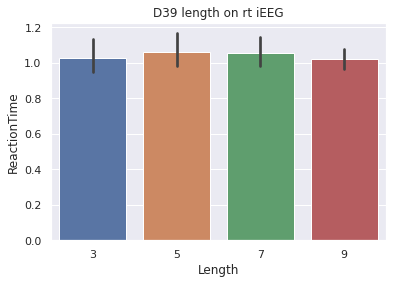

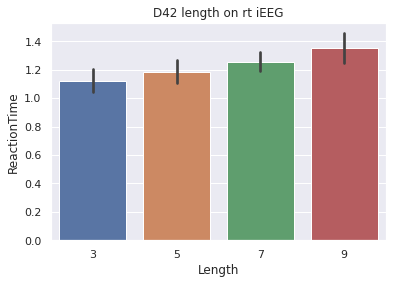

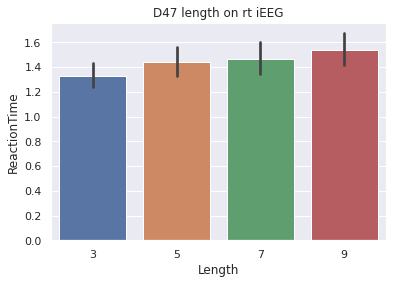

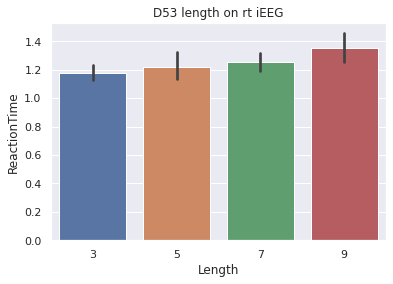

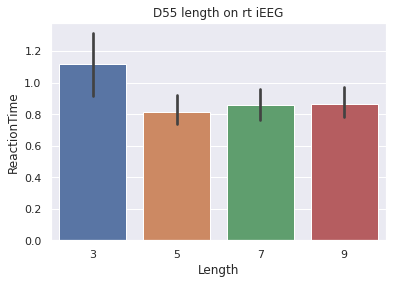

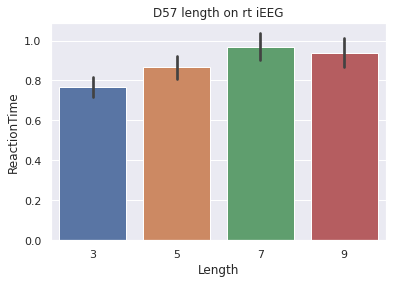

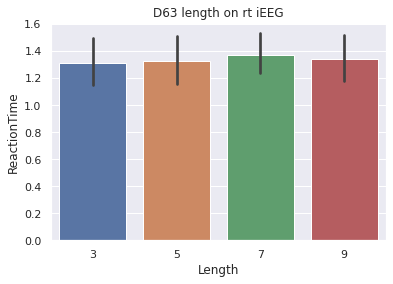

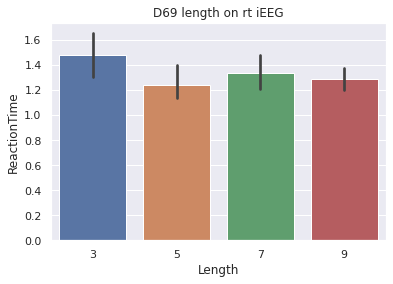

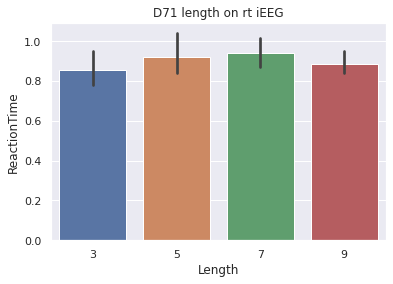

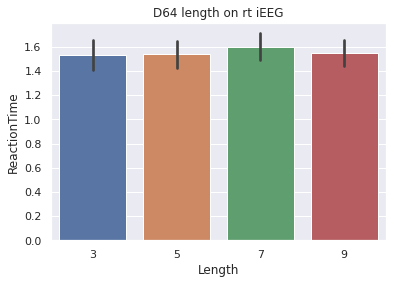

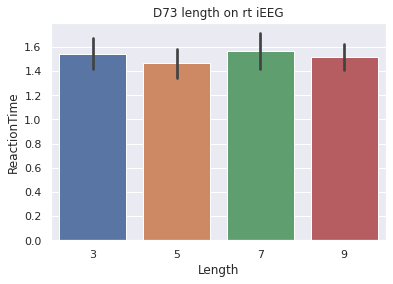

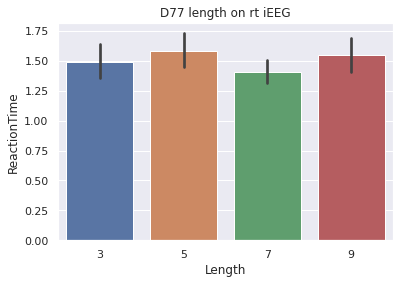

In [ ]:
for i in ieeg.Subject.unique():
  subset = ieeg[ieeg['Subject'] == i]
  pl.figure()
  sns.barplot(x='Length', y='ReactionTime', data=subset)
  pl.title(i + ' length on rt iEEG')

# EEG

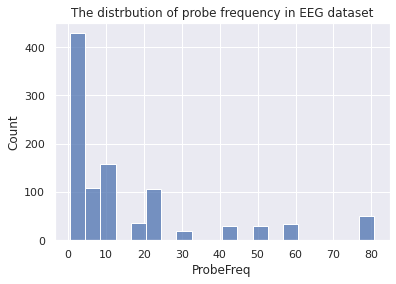

In [ ]:
sns.histplot(eeg_.ProbeFreq)
pl.title('The distrbution of probe frequency in EEG dataset');

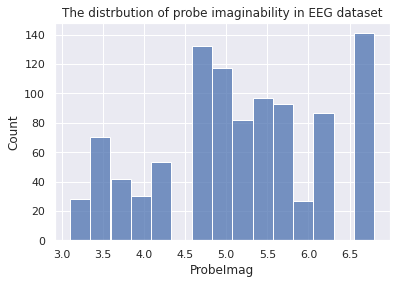

In [ ]:
sns.histplot(eeg_.ProbeImag)
pl.title('The distrbution of probe imaginability in EEG dataset');

In [ ]:
average = []
for i in eeg_.StimImag.values:
  if type(i) is list:
    average.append(sum(i)/len(i))

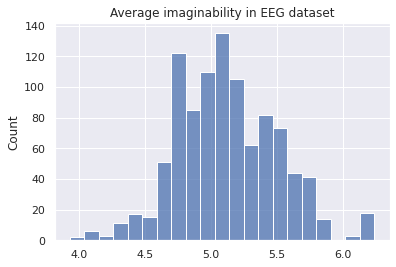

In [ ]:
sns.histplot(average)
pl.title('Average imaginability in EEG dataset');

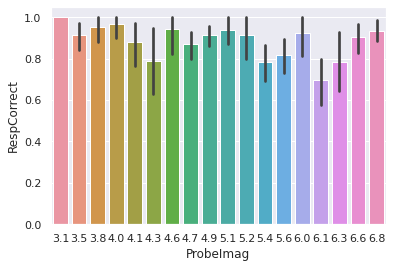

In [ ]:
sns.barplot(x='ProbeImag', y='RespCorrect', data=eeg_[eeg_['StimulusCategory'] == 'words'])

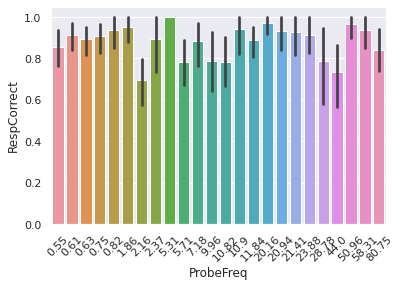

In [ ]:
sns.barplot(x='ProbeFreq', y='RespCorrect', data=eeg_[eeg_['StimulusCategory'] == 'words'])
pl.xticks(rotation = 45);

### Accuracy line plots

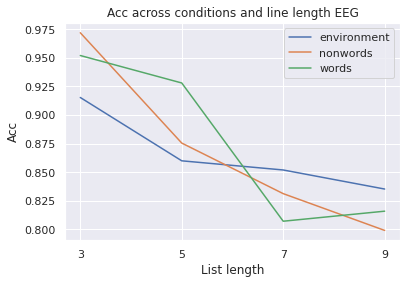

In [ ]:
pl.figure()
subset = eeg_.groupby(['StimulusCategory', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.StimulusCategory.unique():
  x = subset[subset['StimulusCategory'] == i]
  pl.plot(x.Length, x.RespCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.StimulusCategory.unique())
pl.title('Acc across conditions and line length EEG');

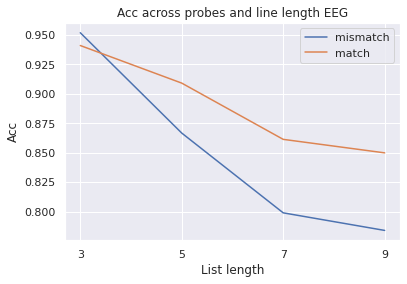

In [ ]:
pl.figure()
subset = eeg_.groupby(['ProbeCategory', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  if i == 1:
    name = 'match'
  elif i == 0:
    name = 'mismatch'
  pl.plot(x.Length, x.RespCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('Acc across probes and line length EEG');

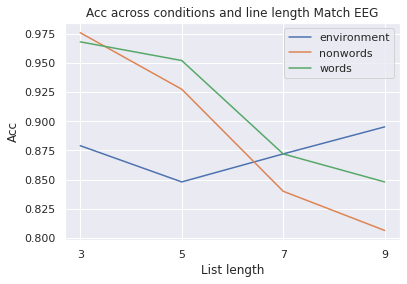

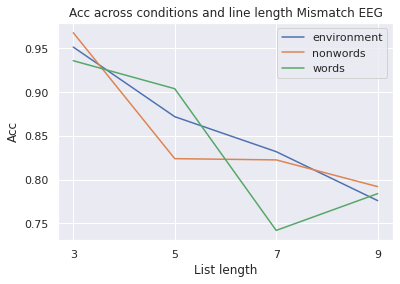

In [ ]:
# ONLY MATCH
pl.figure()
subset = eeg_[eeg_['ProbeCategory'] == 1].groupby(['StimulusCategory', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.StimulusCategory.unique():
  x = subset[subset['StimulusCategory'] == i]
  pl.plot(x.Length, x.RespCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.StimulusCategory.unique())
pl.title('Acc across conditions and line length Match EEG');

# ONLY MISMATCH
pl.figure()
subset = eeg_[eeg_['ProbeCategory'] == 0].groupby(['StimulusCategory', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.StimulusCategory.unique():
  x = subset[subset['StimulusCategory'] == i]
  pl.plot(x.Length, x.RespCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.StimulusCategory.unique())
pl.title('Acc across conditions and line length Mismatch EEG');

### Accuracy bar plots

Mismatch
Ttest_indResult(statistic=-0.4389020383028152, pvalue=0.6608277120027213)
Match
Ttest_indResult(statistic=1.1857806396954327, pvalue=0.2359951756431208)
Words
Ttest_indResult(statistic=-3.2880140531441757, pvalue=0.0010462918381034785)
Nonwords
Ttest_indResult(statistic=-1.6695554412802178, pvalue=0.09532619281509205)


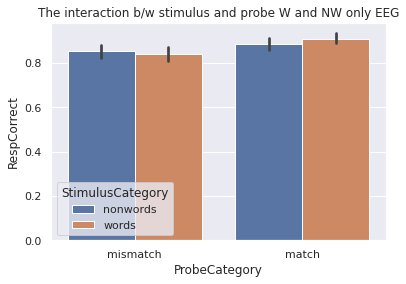

In [ ]:
# Probe type and Lex for W and NW only
ax=sns.barplot(x='ProbeCategory', y='RespCorrect', hue='StimulusCategory',
            data=eeg_[eeg_['StimulusCategory'] != 'environment'])
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The interaction b/w stimulus and probe W and NW only EEG')

print('Mismatch')
subset = eeg_[eeg_['StimulusCategory'] != 'environment']
sub = subset[subset['ProbeCategory'] == 0]
x, y = sub[sub['StimulusCategory'] == 'words']['RespCorrect'], sub[sub['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('Match')
sub = subset[subset['ProbeCategory'] == 1]
x, y = sub[sub['StimulusCategory'] == 'words']['RespCorrect'], sub[sub['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('Words')
sub = subset[subset['StimulusCategory'] == 'words']
x, y = sub[sub['ProbeCategory'] == 0]['RespCorrect'], sub[sub['ProbeCategory'] == 1]['RespCorrect']
print(ttest(x,y))
print('Nonwords')
sub = subset[subset['StimulusCategory'] == 'nonwords']
x, y = sub[sub['ProbeCategory'] == 0]['RespCorrect'], sub[sub['ProbeCategory'] == 1]['RespCorrect']
print(ttest(x,y))

NW vs W
Ttest_indResult(statistic=-0.4284474906807684, pvalue=0.6683716818900234)
NW vs Environment
Ttest_indResult(statistic=0.2554350291355636, pvalue=0.798413506113592)
W vs Environment
Ttest_indResult(statistic=-0.6841461130546627, pvalue=0.4939625083085617)


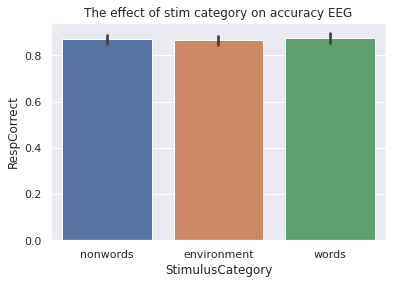

In [ ]:
# STIMULUS CATEGORY ON ACCURACY
sns.barplot(x='StimulusCategory', y='RespCorrect', data = eeg_)
pl.title('The effect of stim category on accuracy EEG');

print('NW vs W')
x, y = eeg_[eeg_['StimulusCategory'] == 'nonwords']['RespCorrect'], eeg_[eeg_['StimulusCategory'] == 'words']['RespCorrect']
print(ttest(x,y))
print('NW vs Environment')
x, y = eeg_[eeg_['StimulusCategory'] == 'nonwords']['RespCorrect'], eeg_[eeg_['StimulusCategory'] == 'environment']['RespCorrect']
print(ttest(x,y))
print('W vs Environment')
x, y = eeg_[eeg_['StimulusCategory'] == 'environment']['RespCorrect'], eeg_[eeg_['StimulusCategory'] == 'words']['RespCorrect']
print(ttest(x,y))

0 vs 1
Ttest_indResult(statistic=-3.255935675875266, pvalue=0.0011430205875872846)


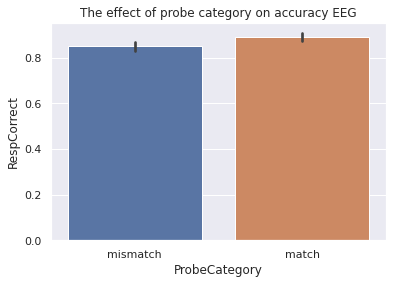

In [ ]:
# PROBE CATEGORY ON ACCURACY
ax = sns.barplot(x='ProbeCategory', y='RespCorrect', data = eeg_)
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The effect of probe category on accuracy EEG');

print('0 vs 1')
x, y = eeg_[eeg_['ProbeCategory'] == 0]['RespCorrect'], eeg_[eeg_['ProbeCategory'] == 1]['RespCorrect']
print(ttest(x,y))

Length 3 vs 5
Ttest_indResult(statistic=4.132916286206337, pvalue=3.801901178090952e-05)
Length 5 vs 7
Ttest_indResult(statistic=-3.212870702346875, pvalue=0.0013430061875053276)
Length 7 vs 9
Ttest_indResult(statistic=0.6778518025150769, pvalue=0.4979706244516925)


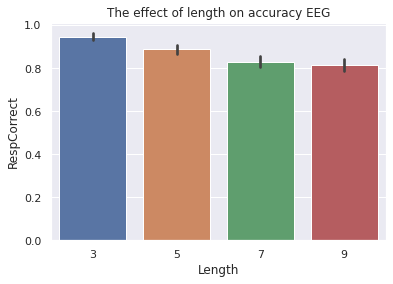

In [ ]:
# LENGTH ON ACCURACY
sns.barplot(x='Length', y='RespCorrect', data = eeg_)
pl.title('The effect of length on accuracy EEG');

print('Length 3 vs 5')
x, y = eeg_[eeg_['Length'] == 3]['RespCorrect'], eeg_[eeg_['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = eeg_[eeg_['Length'] == 7]['RespCorrect'], eeg_[eeg_['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = eeg_[eeg_['Length'] == 7]['RespCorrect'], eeg_[eeg_['Length'] == 9]['RespCorrect']
print(ttest(x,y))

0 vs 1
Nonwords
Ttest_indResult(statistic=array([-1.66955544]), pvalue=array([0.09532619]))
Environment
Ttest_indResult(statistic=array([-0.72983297]), pvalue=array([0.46566446]))
Words
Ttest_indResult(statistic=array([-3.28801405]), pvalue=array([0.00104629]))

NW vs W vs E
ProbeType 0
W vs NW Ttest_indResult(statistic=array([-0.43890204]), pvalue=array([0.66082771]))
W vs E Ttest_indResult(statistic=array([-0.70808498]), pvalue=array([0.47905815]))
NW vs E Ttest_indResult(statistic=array([0.26922055]), pvalue=array([0.78781573]))
ProbeType 1
W vs NW Ttest_indResult(statistic=array([1.18578064]), pvalue=array([0.23599518]))
W vs E Ttest_indResult(statistic=array([1.85698522]), pvalue=array([0.06361519]))
NW vs E Ttest_indResult(statistic=array([-0.67171276]), pvalue=array([0.50192317]))


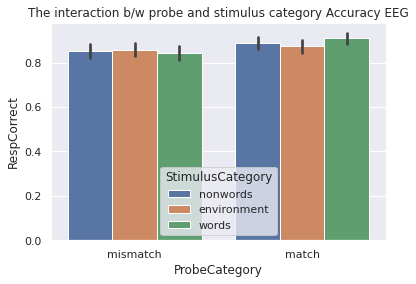

In [ ]:
# INTERACTION B/W PROBE AND STIMULUS
ax=sns.barplot(x='ProbeCategory', y='RespCorrect', hue='StimulusCategory', data = eeg_)
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The interaction b/w probe and stimulus category Accuracy EEG');

print('0 vs 1')
print('Nonwords')
subset = eeg_[eeg_['StimulusCategory'] == 'nonwords']
x, y = subset[subset['ProbeCategory'] == 0][['RespCorrect']], subset[subset['ProbeCategory'] == 1][['RespCorrect']]
print(ttest(x,y))
print('Environment')
subset = eeg_[eeg_['StimulusCategory'] == 'environment']
x, y = subset[subset['ProbeCategory'] == 0][['RespCorrect']], subset[subset['ProbeCategory'] == 1][['RespCorrect']]
print(ttest(x,y))
print('Words')
subset = eeg_[eeg_['StimulusCategory'] == 'words']
x, y = subset[subset['ProbeCategory'] == 0][['RespCorrect']], subset[subset['ProbeCategory'] == 1][['RespCorrect']]
print(ttest(x,y))
print('')
print('NW vs W vs E')
print('ProbeType 0')
subset = eeg_[eeg_['ProbeCategory'] == 0]
x, y = subset[subset['StimulusCategory'] == 'words'][['RespCorrect']], subset[subset['StimulusCategory'] == 'nonwords'][['RespCorrect']]
print('W vs NW', ttest(x,y))
x, y = subset[subset['StimulusCategory'] == 'words'][['RespCorrect']], subset[subset['StimulusCategory'] == 'environment'][['RespCorrect']]
print('W vs E', ttest(x,y))
x, y = subset[subset['StimulusCategory'] == 'environment'][['RespCorrect']], subset[subset['StimulusCategory'] == 'nonwords'][['RespCorrect']]
print('NW vs E', ttest(x,y))

print('ProbeType 1')
subset = eeg_[eeg_['ProbeCategory'] == 1]
x, y = subset[subset['StimulusCategory'] == 'words'][['RespCorrect']], subset[subset['StimulusCategory'] == 'nonwords'][['RespCorrect']]
print('W vs NW', ttest(x,y))
x, y = subset[subset['StimulusCategory'] == 'words'][['RespCorrect']], subset[subset['StimulusCategory'] == 'environment'][['RespCorrect']]
print('W vs E', ttest(x,y))
x, y = subset[subset['StimulusCategory'] == 'environment'][['RespCorrect']], subset[subset['StimulusCategory'] == 'nonwords'][['RespCorrect']]
print('NW vs E', ttest(x,y))

Mismatch
Length 3 vs 5
Ttest_indResult(statistic=4.100412106089179, pvalue=4.66403829548868e-05)
Length 5 vs 7
Ttest_indResult(statistic=-2.48878181853211, pvalue=0.013041343996750207)
Length 7 vs 9
Ttest_indResult(statistic=0.5018924462297406, pvalue=0.6158913363428782)
Match
Length 3 vs 5
Ttest_indResult(statistic=1.6581314334638786, pvalue=0.09772770721704117)
Length 5 vs 7
Ttest_indResult(statistic=-2.053408668773629, pvalue=0.04039183305675221)
Length 7 vs 9
Ttest_indResult(statistic=0.44557545574082075, pvalue=0.656033409136014)
Length 3
Ttest_indResult(statistic=0.6580283596730357, pvalue=0.5107251477603328)
Length 5
Ttest_indResult(statistic=-1.8418542391246469, pvalue=0.06590329240125425)
Length 7
Ttest_indResult(statistic=-2.27693263247104, pvalue=0.023079173340869768)
Length 9
Ttest_indResult(statistic=-2.3348712686890893, pvalue=0.01981935597590295)


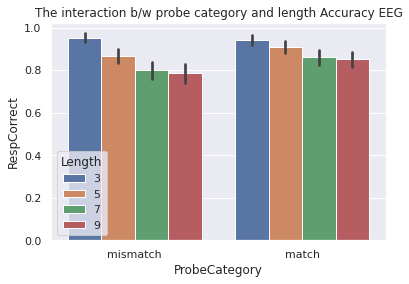

In [ ]:
# INTERACTION B/W PROBE CATEGORY AND LENGTH
ax = sns.barplot(x='ProbeCategory', y='RespCorrect', hue='Length', data = eeg_)
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The interaction b/w probe category and length Accuracy EEG');

print('Mismatch')
subset = eeg_[eeg_['ProbeCategory'] == 0]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 9]['RespCorrect']
print(ttest(x,y))

print('Match')
subset = eeg_[eeg_['ProbeCategory'] == 1]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 9]['RespCorrect']
print(ttest(x,y))

print('Length 3')
subset = eeg_[eeg_['Length'] == 3]
x, y = subset[subset['ProbeCategory'] == 0]['RespCorrect'], subset[subset['ProbeCategory'] == 1]['RespCorrect']
print(ttest(x,y))
print('Length 5')
subset = eeg_[eeg_['Length'] == 5]
x, y = subset[subset['ProbeCategory'] == 0]['RespCorrect'], subset[subset['ProbeCategory'] == 1]['RespCorrect']
print(ttest(x,y))
print('Length 7')
subset = eeg_[eeg_['Length'] == 7]
x, y = subset[subset['ProbeCategory'] == 0]['RespCorrect'], subset[subset['ProbeCategory'] == 1]['RespCorrect']
print(ttest(x,y))
print('Length 9')
subset = eeg_[eeg_['Length'] == 9]
x, y = subset[subset['ProbeCategory'] == 0]['RespCorrect'], subset[subset['ProbeCategory'] == 1]['RespCorrect']
print(ttest(x,y))

Nonwords
Length 3 vs 5
Ttest_indResult(statistic=4.111093346028933, pvalue=4.6082492734625756e-05)
Length 5 vs 7
Ttest_indResult(statistic=-1.3935616164249696, pvalue=0.16407412536743407)
Length 7 vs 9
Ttest_indResult(statistic=0.922669745544684, pvalue=0.3566279353453554)
Environment
Length 3 vs 5
Ttest_indResult(statistic=1.959222888897348, pvalue=0.050670880787850134)
Length 5 vs 7
Ttest_indResult(statistic=-0.2542639107512674, pvalue=0.7993966304176714)
Length 7 vs 9
Ttest_indResult(statistic=0.5114171711565207, pvalue=0.6092866133802122)
Words
Length 3 vs 5
Ttest_indResult(statistic=1.1290456267590538, pvalue=0.25942215645801125)
Length 5 vs 7
Ttest_indResult(statistic=-4.035132246561177, pvalue=6.46501375813529e-05)
Length 7 vs 9
Ttest_indResult(statistic=-0.2500468800879642, pvalue=0.8026544661688713)

Length 3
W vs NW
Ttest_indResult(statistic=-1.1604814274538935, pvalue=0.2464441488220609)
W vs E
Ttest_indResult(statistic=1.644690584763651, pvalue=0.1007120374752066)
E vs NW
T

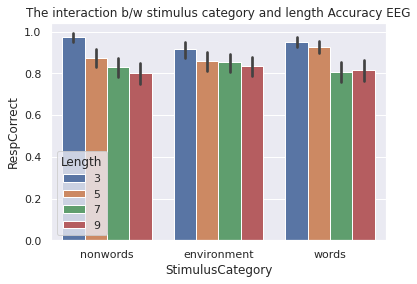

In [ ]:
# INTERACTION B/W STIMULUS CATEGORY AND LENGTH
sns.barplot(x='StimulusCategory', y='RespCorrect', hue='Length', data = eeg_)
pl.title('The interaction b/w stimulus category and length Accuracy EEG');

print('Nonwords')
subset = eeg_[eeg_['StimulusCategory'] == 'nonwords']
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 9]['RespCorrect']
print(ttest(x,y))
print('Environment')
subset = eeg_[eeg_['StimulusCategory'] == 'environment']
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 9]['RespCorrect']
print(ttest(x,y))
print('Words')
subset = eeg_[eeg_['StimulusCategory'] == 'words']
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 9]['RespCorrect']
print(ttest(x,y))

print('')
print('Length 3')
subset = eeg_[eeg_['Length'] == 3]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'environment']['RespCorrect']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('Length 5')
subset = eeg_[eeg_['Length'] == 5]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'environment']['RespCorrect']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('Length 7')
subset = eeg_[eeg_['Length'] == 7]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'environment']['RespCorrect']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('Length 9')
subset = eeg_[eeg_['Length'] == 9]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'environment']['RespCorrect']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))

### Reaction Time line plots

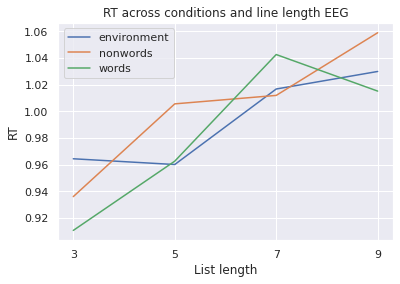

In [ ]:
pl.figure()
subset = eeg_no_nones.groupby(['StimulusCategory', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.StimulusCategory.unique():
  x = subset[subset['StimulusCategory'] == i]
  pl.plot(x.Length, x.ReactionTime)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend(subset.StimulusCategory.unique())
pl.title('RT across conditions and line length EEG');

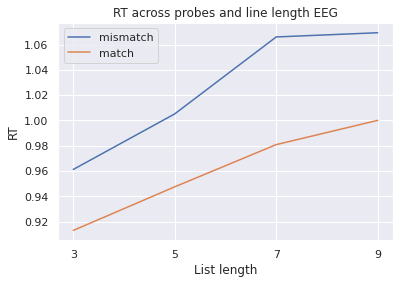

In [ ]:
pl.figure()
subset = eeg_no_nones.groupby(['ProbeCategory', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  if i == 1:
    name = 'match'
  elif i == 0:
    name = 'mismatch'
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('RT across probes and line length EEG');

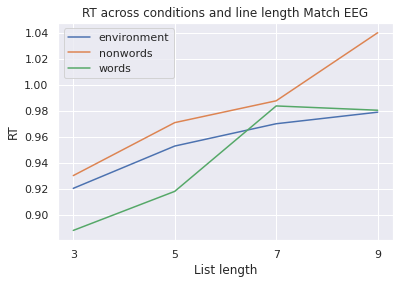

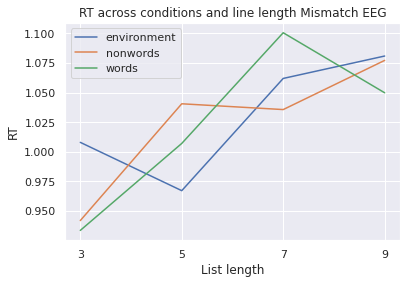

In [ ]:
# ONLY MATCH
pl.figure()
subset = eeg_no_nones[eeg_no_nones['ProbeCategory'] == 1].groupby(['StimulusCategory', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.StimulusCategory.unique():
  x = subset[subset['StimulusCategory'] == i]
  pl.plot(x.Length, x.ReactionTime)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend(subset.StimulusCategory.unique())
pl.title('RT across conditions and line length Match EEG');

# ONLY MISMATCH
pl.figure()
subset = eeg_no_nones[eeg_no_nones['ProbeCategory'] == 0].groupby(['StimulusCategory', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.StimulusCategory.unique():
  x = subset[subset['StimulusCategory'] == i]
  pl.plot(x.Length, x.ReactionTime)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend(subset.StimulusCategory.unique())
pl.title('RT across conditions and line length Mismatch EEG');

### Reaction Time bar plots

NW vs W
Ttest_indResult(statistic=1.4175576266968544, pvalue=0.1564786424891116)
NW vs Environment
Ttest_indResult(statistic=0.6911049314570566, pvalue=0.48958161573610814)
W vs Environment
Ttest_indResult(statistic=0.70557677153618, pvalue=0.48053567710421374)


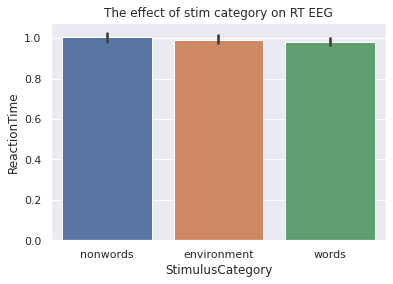

In [ ]:
# STIMULUS CATEGORY ON ACCURACY
sns.barplot(x='StimulusCategory', y='ReactionTime', data = eeg_no_nones)
pl.title('The effect of stim category on RT EEG');

print('NW vs W')
x, y = eeg_no_nones[eeg_no_nones['StimulusCategory'] == 'nonwords']['ReactionTime'], eeg_no_nones[eeg_no_nones['StimulusCategory'] == 'words']['ReactionTime']
print(ttest(x,y))
print('NW vs Environment')
x, y = eeg_no_nones[eeg_no_nones['StimulusCategory'] == 'nonwords']['ReactionTime'], eeg_no_nones[eeg_no_nones['StimulusCategory'] == 'environment']['ReactionTime']
print(ttest(x,y))
print('W vs Environment')
x, y = eeg_no_nones[eeg_no_nones['StimulusCategory'] == 'environment']['ReactionTime'], eeg_no_nones[eeg_no_nones['StimulusCategory'] == 'words']['ReactionTime']
print(ttest(x,y))

0 vs 1
Ttest_indResult(statistic=5.467147264673293, pvalue=4.9621422878254886e-08)


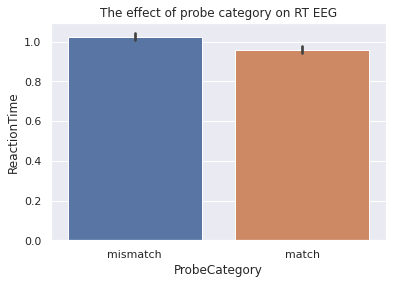

In [ ]:
# PROBE CATEGORY ON ACCURACY
ax = sns.barplot(x='ProbeCategory', y='ReactionTime', data = eeg_no_nones)
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The effect of probe category on RT EEG');

print('0 vs 1')
x, y = eeg_no_nones[eeg_no_nones['ProbeCategory'] == 0]['ReactionTime'], eeg_no_nones[eeg_no_nones['ProbeCategory'] == 1]['ReactionTime']
print(ttest(x,y))

Length 3 vs 5
Ttest_indResult(statistic=-2.387255243267083, pvalue=0.01710053469463928)
Length 5 vs 7
Ttest_indResult(statistic=2.8295807472835715, pvalue=0.004724521185736144)
Length 7 vs 9
Ttest_indResult(statistic=-0.6327728060558325, pvalue=0.5269803033072549)


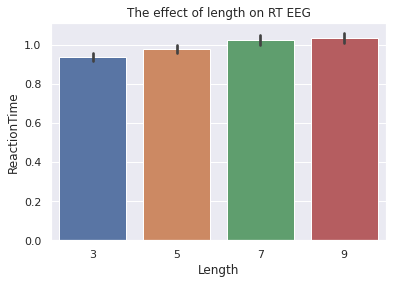

In [ ]:
# LENGTH ON ACCURACY
sns.barplot(x='Length', y='ReactionTime', data = eeg_no_nones)
pl.title('The effect of length on RT EEG');

print('Length 3 vs 5')
x, y = eeg_no_nones[eeg_no_nones['Length'] == 3]['ReactionTime'], eeg_no_nones[eeg_no_nones['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = eeg_no_nones[eeg_no_nones['Length'] == 7]['ReactionTime'], eeg_no_nones[eeg_no_nones['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = eeg_no_nones[eeg_no_nones['Length'] == 7]['ReactionTime'], eeg_no_nones[eeg_no_nones['Length'] == 9]['ReactionTime']
print(ttest(x,y))

0 vs 1
Nonwords
Ttest_indResult(statistic=array([1.97294624]), pvalue=array([0.04878211]))
Environment
Ttest_indResult(statistic=array([3.51478809]), pvalue=array([0.00046098]))
Words
Ttest_indResult(statistic=array([4.04411999]), pvalue=array([5.67472476e-05]))

NW vs W vs E
ProbeType 0
W vs NW Ttest_indResult(statistic=array([-0.0633929]), pvalue=array([0.94946653]))
W vs E Ttest_indResult(statistic=array([-0.31886219]), pvalue=array([0.74989931]))
NW vs E Ttest_indResult(statistic=array([0.25632907]), pvalue=array([0.79775083]))
ProbeType 1
W vs NW Ttest_indResult(statistic=array([-2.05449426]), pvalue=array([0.04019606]))
W vs E Ttest_indResult(statistic=array([-0.70738563]), pvalue=array([0.47949644]))
NW vs E Ttest_indResult(statistic=array([-1.33616723]), pvalue=array([0.18180731]))


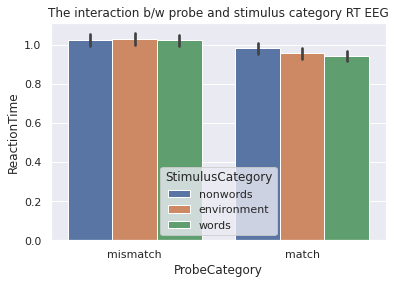

In [ ]:
# INTERACTION B/W PROBE AND STIMULUS
ax = sns.barplot(x='ProbeCategory', y='ReactionTime', hue='StimulusCategory', data = eeg_no_nones)
ax.set_xticklabels(['mismatch','match'])
pl.title('The interaction b/w probe and stimulus category RT EEG');

print('0 vs 1')
print('Nonwords')
subset = eeg_no_nones[eeg_no_nones['StimulusCategory'] == 'nonwords']
x, y = subset[subset['ProbeCategory'] == 0][['ReactionTime']], subset[subset['ProbeCategory'] == 1][['ReactionTime']]
print(ttest(x,y))
print('Environment')
subset = eeg_no_nones[eeg_no_nones['StimulusCategory'] == 'environment']
x, y = subset[subset['ProbeCategory'] == 0][['ReactionTime']], subset[subset['ProbeCategory'] == 1][['ReactionTime']]
print(ttest(x,y))
print('Words')
subset = eeg_no_nones[eeg_no_nones['StimulusCategory'] == 'words']
x, y = subset[subset['ProbeCategory'] == 0][['ReactionTime']], subset[subset['ProbeCategory'] == 1][['ReactionTime']]
print(ttest(x,y))
print('')
print('NW vs W vs E')
print('ProbeType 0')
subset = eeg_no_nones[eeg_no_nones['ProbeCategory'] == 0]
x, y = subset[subset['StimulusCategory'] == 'words'][['ReactionTime']], subset[subset['StimulusCategory'] == 'nonwords'][['ReactionTime']]
print('W vs NW', ttest(x,y))
x, y = subset[subset['StimulusCategory'] == 'words'][['ReactionTime']], subset[subset['StimulusCategory'] == 'environment'][['ReactionTime']]
print('W vs E', ttest(x,y))
x, y = subset[subset['StimulusCategory'] == 'environment'][['ReactionTime']], subset[subset['StimulusCategory'] == 'nonwords'][['ReactionTime']]
print('NW vs E', ttest(x,y))

print('ProbeType 1')
subset = eeg_no_nones[eeg_no_nones['ProbeCategory'] == 1]
x, y = subset[subset['StimulusCategory'] == 'words'][['ReactionTime']], subset[subset['StimulusCategory'] == 'nonwords'][['ReactionTime']]
print('W vs NW', ttest(x,y))
x, y = subset[subset['StimulusCategory'] == 'words'][['ReactionTime']], subset[subset['StimulusCategory'] == 'environment'][['ReactionTime']]
print('W vs E', ttest(x,y))
x, y = subset[subset['StimulusCategory'] == 'environment'][['ReactionTime']], subset[subset['StimulusCategory'] == 'nonwords'][['ReactionTime']]
print('NW vs E', ttest(x,y))

Mismatch
Length 3 vs 5
Ttest_indResult(statistic=-1.784388889664443, pvalue=0.07477604681277272)
Length 5 vs 7
Ttest_indResult(statistic=2.4851480054219897, pvalue=0.013171895648954143)
Length 7 vs 9
Ttest_indResult(statistic=-0.1301242572843359, pvalue=0.8965036734532332)
Match
Length 3 vs 5
Ttest_indResult(statistic=-1.5999535580371238, pvalue=0.11004054851275095)
Length 5 vs 7
Ttest_indResult(statistic=1.4730238268258864, pvalue=0.1411757227959934)
Length 7 vs 9
Ttest_indResult(statistic=-0.8390638219290173, pvalue=0.40170719017302514)
Length 3
Ttest_indResult(statistic=2.0767232985018906, pvalue=0.03818738990008427)
Length 5
Ttest_indResult(statistic=2.5010385615165567, pvalue=0.012601513962726877)
Length 7
Ttest_indResult(statistic=3.5335807656025158, pvalue=0.0004358388686693889)
Length 9
Ttest_indResult(statistic=2.8393718336398286, pvalue=0.004647080468975698)


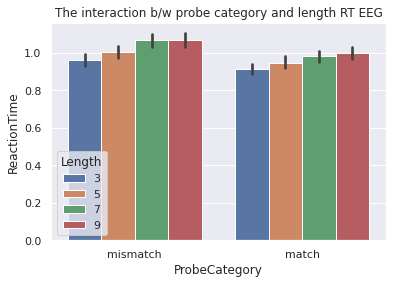

In [ ]:
# INTERACTION B/W PROBE CATEGORY AND LENGTH
ax = sns.barplot(x='ProbeCategory', y='ReactionTime', hue='Length', data = eeg_no_nones)
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The interaction b/w probe category and length RT EEG');

print('Mismatch')
subset = eeg_no_nones[eeg_no_nones['ProbeCategory'] == 0]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 9]['ReactionTime']
print(ttest(x,y))

print('Match')
subset = eeg_no_nones[eeg_no_nones['ProbeCategory'] == 1]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 9]['ReactionTime']
print(ttest(x,y))

print('Length 3')
subset = eeg_no_nones[eeg_no_nones['Length'] == 3]
x, y = subset[subset['ProbeCategory'] == 0]['ReactionTime'], subset[subset['ProbeCategory'] == 1]['ReactionTime']
print(ttest(x,y))
print('Length 5')
subset = eeg_no_nones[eeg_no_nones['Length'] == 5]
x, y = subset[subset['ProbeCategory'] == 0]['ReactionTime'], subset[subset['ProbeCategory'] == 1]['ReactionTime']
print(ttest(x,y))
print('Length 7')
subset = eeg_no_nones[eeg_no_nones['Length'] == 7]
x, y = subset[subset['ProbeCategory'] == 0]['ReactionTime'], subset[subset['ProbeCategory'] == 1]['ReactionTime']
print(ttest(x,y))
print('Length 9')
subset = eeg_no_nones[eeg_no_nones['Length'] == 9]
x, y = subset[subset['ProbeCategory'] == 0]['ReactionTime'], subset[subset['ProbeCategory'] == 1]['ReactionTime']
print(ttest(x,y))

Nonwords
Length 3 vs 5
Ttest_indResult(statistic=-2.3608850767808494, pvalue=0.01862312378878202)
Length 5 vs 7
Ttest_indResult(statistic=0.2203271375488629, pvalue=0.8257085756724849)
Length 7 vs 9
Ttest_indResult(statistic=-1.5672917499477528, pvalue=0.11768942054167505)
Environment
Length 3 vs 5
Ttest_indResult(statistic=0.14596794601139662, pvalue=0.8840075964258224)
Length 5 vs 7
Ttest_indResult(statistic=1.8632614555025342, pvalue=0.06303614489332564)
Length 7 vs 9
Ttest_indResult(statistic=-0.4349605168962148, pvalue=0.6637850866417293)
Words
Length 3 vs 5
Ttest_indResult(statistic=-1.9827935528199137, pvalue=0.04794672758821507)
Length 5 vs 7
Ttest_indResult(statistic=2.841668172035334, pvalue=0.004680985575271657)
Length 7 vs 9
Ttest_indResult(statistic=0.9260302241375165, pvalue=0.3548883194704572)

Length 3
W vs NW
Ttest_indResult(statistic=-0.906978738462696, pvalue=0.3648667134694521)
W vs E
Ttest_indResult(statistic=-1.901302048699282, pvalue=0.05785466106211742)
E vs NW


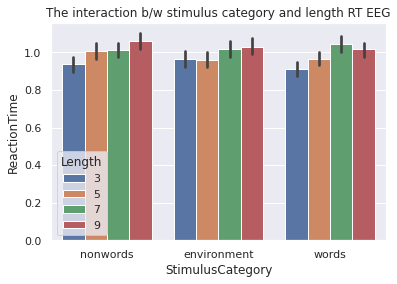

In [ ]:
# INTERACTION B/W STIMULUS CATEGORY AND LENGTH
sns.barplot(x='StimulusCategory', y='ReactionTime', hue='Length', data = eeg_no_nones)
pl.title('The interaction b/w stimulus category and length RT EEG');

print('Nonwords')
subset = eeg_no_nones[eeg_no_nones['StimulusCategory'] == 'nonwords']
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 9]['ReactionTime']
print(ttest(x,y))
print('Environment')
subset = eeg_no_nones[eeg_no_nones['StimulusCategory'] == 'environment']
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 9]['ReactionTime']
print(ttest(x,y))
print('Words')
subset = eeg_no_nones[eeg_no_nones['StimulusCategory'] == 'words']
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 9]['ReactionTime']
print(ttest(x,y))

print('')
print('Length 3')
subset = eeg_no_nones[eeg_no_nones['Length'] == 3]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['ReactionTime'], subset[subset['StimulusCategory'] == 'nonwords']['ReactionTime']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['ReactionTime'], subset[subset['StimulusCategory'] == 'environment']['ReactionTime']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['ReactionTime'], subset[subset['StimulusCategory'] == 'nonwords']['ReactionTime']
print(ttest(x,y))
print('Length 5')
subset = eeg_no_nones[eeg_no_nones['Length'] == 5]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['ReactionTime'], subset[subset['StimulusCategory'] == 'nonwords']['ReactionTime']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['ReactionTime'], subset[subset['StimulusCategory'] == 'environment']['ReactionTime']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['ReactionTime'], subset[subset['StimulusCategory'] == 'nonwords']['ReactionTime']
print(ttest(x,y))
print('Length 7')
subset = eeg_no_nones[eeg_no_nones['Length'] == 7]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['ReactionTime'], subset[subset['StimulusCategory'] == 'nonwords']['ReactionTime']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['ReactionTime'], subset[subset['StimulusCategory'] == 'environment']['ReactionTime']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['ReactionTime'], subset[subset['StimulusCategory'] == 'nonwords']['ReactionTime']
print(ttest(x,y))
print('Length 9')
subset = eeg_no_nones[eeg_no_nones['Length'] == 9]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['ReactionTime'], subset[subset['StimulusCategory'] == 'nonwords']['ReactionTime']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['ReactionTime'], subset[subset['StimulusCategory'] == 'environment']['ReactionTime']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['ReactionTime'], subset[subset['StimulusCategory'] == 'nonwords']['ReactionTime']
print(ttest(x,y))

### Models

In [ ]:
eeg_.head()

**Accuracy**

In [ ]:
eeg_data = eeg_[['StimulusCategory', 'RespCorrect',
                 'ProbeCategory', 'ReactionTime',
                 'Trial', 'Subject', 'Length',
                 'Words', 'Nonwords', 'Environment']]

In [ ]:
%%R -i eeg_data
comp1<-lmer('RespCorrect ~ Length + ProbeCategory + (1|Subject)', data=eeg_data)
comp2<-lmer('RespCorrect ~ Length + ProbeCategory + Length:ProbeCategory + (1|Subject)', data=eeg_data)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1    5 1892.214 1922.233 -941.1070 1882.214       NA NA         NA
2    6 1888.883 1924.905 -938.4415 1876.883 5.331088  1  0.0209483


In [ ]:
tryout1 = Lmer(
    'RespCorrect ~ Length + ProbeCategory + Length:ProbeCategory + (1|Subject)',
    data = eeg_data
)
tryout1.fit()

Formula: RespCorrect~Length+ProbeCategory+Length:ProbeCategory+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2992	 Groups: {'Subject': 14.0}

Log-likelihood: -955.070 	 AIC: 1910.140

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.024
Residual               0.109  0.331

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.021,0.972,1.071,0.025,726.061,40.400,0.000,***
Length,-0.029,-0.036,-0.021,0.004,2974.905,-7.470,0.000,***
ProbeCategory,-0.035,-0.103,0.033,0.035,2974.905,-1.012,0.312,
Length:ProbeCategory,0.012,0.002,0.023,0.005,2974.903,2.309,0.021,*


**Reaction time**

In [ ]:
eeg_rt_data = eeg_no_nones[['StimulusCategory', 'RespCorrect',
                 'ProbeCategory', 'ReactionTime',
                 'Trial', 'Subject', 'Length',
                 'Words', 'Nonwords', 'Environment']]

In [ ]:
%%R -i eeg_rt_data
comp1<-lmer('ReactionTime ~ ProbeCategory + Length + (1|Subject)', data=eeg_rt_data)
comp2<-lmer('ReactionTime ~ ProbeCategory + Length + ProbeCategory:Length + (1|Subject)', data=eeg_rt_data)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1    5 163.4806 193.4199 -76.74031 153.4806       NA NA         NA
2    6 164.3557 200.2828 -76.17783 152.3557 1.124954  1  0.2888542


In [ ]:
tryout1 = Lmer(
    'ReactionTime ~ ProbeCategory + Length + (1|Subject)',
    data = eeg_rt_data
)
tryout1.fit()

Formula: ReactionTime~ProbeCategory+Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2945	 Groups: {'Subject': 14.0}

Log-likelihood: -87.769 	 AIC: 175.538

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.046  0.214
Residual               0.060  0.246

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.928,0.813,1.044,0.059,14.359,15.769,0.0,***
ProbeCategory,-0.066,-0.084,-0.048,0.009,2929.004,-7.289,0.0,***
Length,0.017,0.013,0.021,0.002,2929.005,8.252,0.0,***


# iEEG

### Accuracy line plots

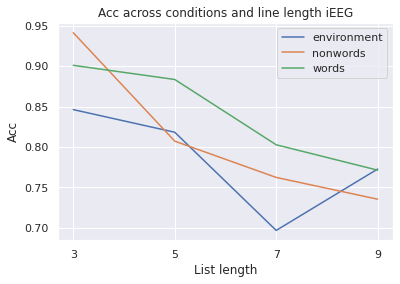

In [ ]:
pl.figure()
subset = ieeg_.groupby(['StimulusCategory', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.StimulusCategory.unique():
  x = subset[subset['StimulusCategory'] == i]
  pl.plot(x.Length, x.RespCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.StimulusCategory.unique())
pl.title('Acc across conditions and line length iEEG');

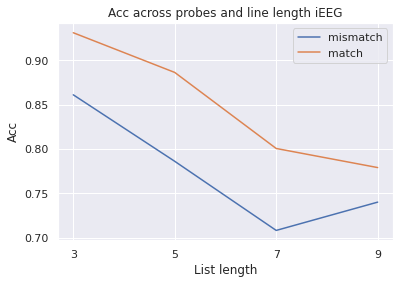

In [ ]:
pl.figure()
subset = ieeg_.groupby(['ProbeCategory', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  if i == 1:
    name = 'match'
  elif i == 0:
    name = 'mismatch'
  pl.plot(x.Length, x.RespCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('Acc across probes and line length iEEG');

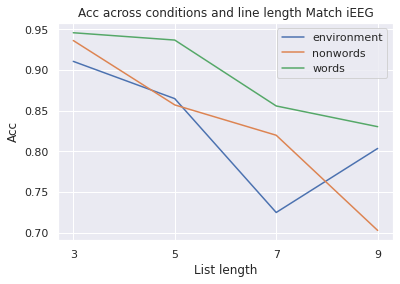

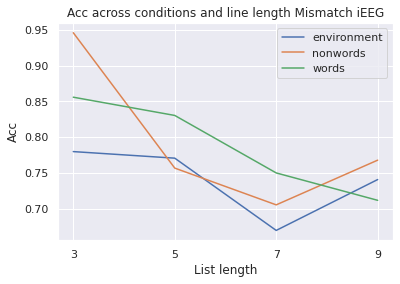

In [ ]:
# ONLY MATCH
pl.figure()
subset = ieeg_[ieeg_['ProbeCategory'] == 1].groupby(['StimulusCategory', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.StimulusCategory.unique():
  x = subset[subset['StimulusCategory'] == i]
  pl.plot(x.Length, x.RespCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.StimulusCategory.unique())
pl.title('Acc across conditions and line length Match iEEG');

# ONLY MISMATCH
pl.figure()
subset = ieeg_[ieeg_['ProbeCategory'] == 0].groupby(['StimulusCategory', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.StimulusCategory.unique():
  x = subset[subset['StimulusCategory'] == i]
  pl.plot(x.Length, x.RespCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.StimulusCategory.unique())
pl.title('Acc across conditions and line length Mismatch iEEG');

### Accuracy bar plots

Mismatch
Ttest_indResult(statistic=-0.9004237323335437, pvalue=0.3681378237247557)
Match
Ttest_indResult(statistic=2.8575294182643876, pvalue=0.00437221870176763)
Words
Ttest_indResult(statistic=-4.093970562156874, pvalue=4.648358056936293e-05)
Nonwords
Ttest_indResult(statistic=-0.33754313576449, pvalue=0.7357869144212095)


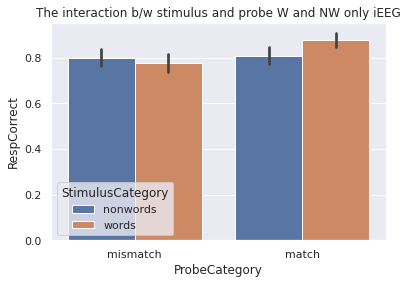

In [ ]:
# Probe type and Lex for W and NW only
ax=sns.barplot(x='ProbeCategory', y='RespCorrect', hue='StimulusCategory',
            data=ieeg_[ieeg_['StimulusCategory'] != 'environment'])
ax.set_xticklabels(['mismatch','match'])
pl.title('The interaction b/w stimulus and probe W and NW only iEEG')

print('Mismatch')
subset = ieeg_[ieeg_['StimulusCategory'] != 'environment']
sub = subset[subset['ProbeCategory'] == 0]
x, y = sub[sub['StimulusCategory'] == 'words']['RespCorrect'], sub[sub['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('Match')
sub = subset[subset['ProbeCategory'] == 1]
x, y = sub[sub['StimulusCategory'] == 'words']['RespCorrect'], sub[sub['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('Words')
sub = subset[subset['StimulusCategory'] == 'words']
x, y = sub[sub['ProbeCategory'] == 0]['RespCorrect'], sub[sub['ProbeCategory'] == 1]['RespCorrect']
print(ttest(x,y))
print('Nonwords')
sub = subset[subset['StimulusCategory'] == 'nonwords']
x, y = sub[sub['ProbeCategory'] == 0]['RespCorrect'], sub[sub['ProbeCategory'] == 1]['RespCorrect']
print(ttest(x,y))

NW vs W
Ttest_indResult(statistic=-1.5714398532755909, pvalue=0.11625909195287973)
NW vs Environment
Ttest_indResult(statistic=1.454901339081477, pvalue=0.14587453395918823)
W vs Environment
Ttest_indResult(statistic=-3.022688006014574, pvalue=0.0025419094389221132)


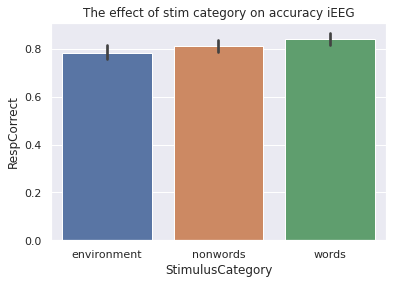

In [ ]:
# STIMULUS CATEGORY ON ACCURACY
sns.barplot(x='StimulusCategory', y='RespCorrect', data = ieeg_)
pl.title('The effect of stim category on accuracy iEEG');

print('NW vs W')
x, y = ieeg_[ieeg_['StimulusCategory'] == 'nonwords']['RespCorrect'], ieeg_[ieeg_['StimulusCategory'] == 'words']['RespCorrect']
print(ttest(x,y))
print('NW vs Environment')
x, y = ieeg_[ieeg_['StimulusCategory'] == 'nonwords']['RespCorrect'], ieeg_[ieeg_['StimulusCategory'] == 'environment']['RespCorrect']
print(ttest(x,y))
print('W vs Environment')
x, y = ieeg_[ieeg_['StimulusCategory'] == 'environment']['RespCorrect'], ieeg_[ieeg_['StimulusCategory'] == 'words']['RespCorrect']
print(ttest(x,y))

0 vs 1
Ttest_indResult(statistic=-5.003230800649704, pvalue=6.014369637596502e-07)


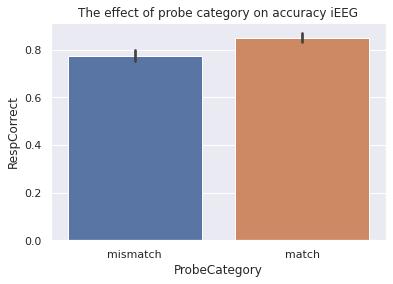

In [ ]:
# PROBE CATEGORY ON ACCURACY
ax = sns.barplot(x='ProbeCategory', y='RespCorrect', data = ieeg_)
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The effect of probe category on accuracy iEEG');

print('0 vs 1')
x, y = ieeg_[ieeg_['ProbeCategory'] == 0]['RespCorrect'], ieeg_[ieeg_['ProbeCategory'] == 1]['RespCorrect']
print(ttest(x,y))

Length 3 vs 5
Ttest_indResult(statistic=3.21077519139395, pvalue=0.0013565992834228874)
Length 5 vs 7
Ttest_indResult(statistic=-3.736038384981854, pvalue=0.00019502991930840224)
Length 7 vs 9
Ttest_indResult(statistic=-0.23972712360960674, pvalue=0.8105787196551539)


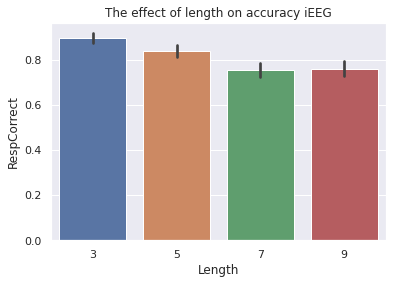

In [ ]:
# LENGTH ON ACCURACY
sns.barplot(x='Length', y='RespCorrect', data = ieeg_)
pl.title('The effect of length on accuracy iEEG');

print('Length 3 vs 5')
x, y = ieeg_[ieeg_['Length'] == 3]['RespCorrect'], ieeg_[ieeg_['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = ieeg_[ieeg_['Length'] == 7]['RespCorrect'], ieeg_[ieeg_['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = ieeg_[ieeg_['Length'] == 7]['RespCorrect'], ieeg_[ieeg_['Length'] == 9]['RespCorrect']
print(ttest(x,y))

0 vs 1
Nonwords
Ttest_indResult(statistic=array([-1.33826257]), pvalue=array([0.18115496]))
Environment
Ttest_indResult(statistic=array([-3.14181481]), pvalue=array([0.00173665]))
Words
Ttest_indResult(statistic=array([-4.31595509]), pvalue=array([1.78097358e-05]))

NW vs W vs E
ProbeType 0
W vs NW Ttest_indResult(statistic=array([-0.24649932]), pvalue=array([0.80535257]))
W vs E Ttest_indResult(statistic=array([1.65346673]), pvalue=array([0.09859447]))
NW vs E Ttest_indResult(statistic=array([-1.8989808]), pvalue=array([0.05789628]))
ProbeType 1
W vs NW Ttest_indResult(statistic=array([2.7318893]), pvalue=array([0.00642707]))
W vs E Ttest_indResult(statistic=array([2.82034541]), pvalue=array([0.00490845]))
NW vs E Ttest_indResult(statistic=array([-0.08876248]), pvalue=array([0.92929074]))


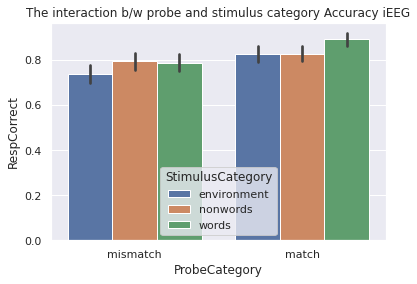

In [ ]:
# INTERACTION B/W PROBE AND STIMULUS
ax=sns.barplot(x='ProbeCategory', y='RespCorrect', hue='StimulusCategory', data = ieeg_)
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The interaction b/w probe and stimulus category Accuracy iEEG');

print('0 vs 1')
print('Nonwords')
subset = ieeg_[ieeg_['StimulusCategory'] == 'nonwords']
x, y = subset[subset['ProbeCategory'] == 0][['RespCorrect']], subset[subset['ProbeCategory'] == 1][['RespCorrect']]
print(ttest(x,y))
print('Environment')
subset = ieeg_[ieeg_['StimulusCategory'] == 'environment']
x, y = subset[subset['ProbeCategory'] == 0][['RespCorrect']], subset[subset['ProbeCategory'] == 1][['RespCorrect']]
print(ttest(x,y))
print('Words')
subset = ieeg_[ieeg_['StimulusCategory'] == 'words']
x, y = subset[subset['ProbeCategory'] == 0][['RespCorrect']], subset[subset['ProbeCategory'] == 1][['RespCorrect']]
print(ttest(x,y))
print('')
print('NW vs W vs E')
print('ProbeType 0')
subset = ieeg_[ieeg_['ProbeCategory'] == 0]
x, y = subset[subset['StimulusCategory'] == 'words'][['RespCorrect']], subset[subset['StimulusCategory'] == 'nonwords'][['RespCorrect']]
print('W vs NW', ttest(x,y))
x, y = subset[subset['StimulusCategory'] == 'words'][['RespCorrect']], subset[subset['StimulusCategory'] == 'environment'][['RespCorrect']]
print('W vs E', ttest(x,y))
x, y = subset[subset['StimulusCategory'] == 'environment'][['RespCorrect']], subset[subset['StimulusCategory'] == 'nonwords'][['RespCorrect']]
print('NW vs E', ttest(x,y))

print('ProbeType 1')
subset = ieeg_[ieeg_['ProbeCategory'] == 1]
x, y = subset[subset['StimulusCategory'] == 'words'][['RespCorrect']], subset[subset['StimulusCategory'] == 'nonwords'][['RespCorrect']]
print('W vs NW', ttest(x,y))
x, y = subset[subset['StimulusCategory'] == 'words'][['RespCorrect']], subset[subset['StimulusCategory'] == 'environment'][['RespCorrect']]
print('W vs E', ttest(x,y))
x, y = subset[subset['StimulusCategory'] == 'environment'][['RespCorrect']], subset[subset['StimulusCategory'] == 'nonwords'][['RespCorrect']]
print('NW vs E', ttest(x,y))

Mismatch
Length 3 vs 5
Ttest_indResult(statistic=2.5379949571904774, pvalue=0.011383707545804278)
Length 5 vs 7
Ttest_indResult(statistic=-2.320267375351969, pvalue=0.02063018070643596)
Length 7 vs 9
Ttest_indResult(statistic=-0.9195720146266914, pvalue=0.35813003359376094)
Match
Length 3 vs 5
Ttest_indResult(statistic=2.0063153641891915, pvalue=0.04524633880072454)
Length 5 vs 7
Ttest_indResult(statistic=-3.0530408952025065, pvalue=0.0023610619478509165)
Length 7 vs 9
Ttest_indResult(statistic=0.680215136688261, pvalue=0.4966054961499864)
Length 3
Ttest_indResult(statistic=-2.963847604458449, pvalue=0.0031576809109017134)
Length 5
Ttest_indResult(statistic=-3.5150234888390446, pvalue=0.0004716094196289522)
Length 7
Ttest_indResult(statistic=-2.7814945875710384, pvalue=0.005566209463555815)
Length 9
Ttest_indResult(statistic=-1.1746268845807977, pvalue=0.24056701418091647)


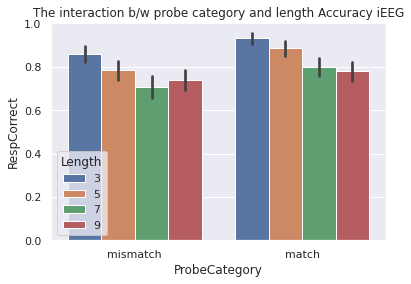

In [ ]:
# INTERACTION B/W PROBE CATEGORY AND LENGTH
ax = sns.barplot(x='ProbeCategory', y='RespCorrect', hue='Length', data = ieeg_)
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The interaction b/w probe category and length Accuracy iEEG');

print('Mismatch')
subset = ieeg_[ieeg_['ProbeCategory'] == 0]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 9]['RespCorrect']
print(ttest(x,y))

print('Match')
subset = ieeg_[ieeg_['ProbeCategory'] == 1]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 9]['RespCorrect']
print(ttest(x,y))

print('Length 3')
subset = ieeg_[ieeg_['Length'] == 3]
x, y = subset[subset['ProbeCategory'] == 0]['RespCorrect'], subset[subset['ProbeCategory'] == 1]['RespCorrect']
print(ttest(x,y))
print('Length 5')
subset = ieeg_[ieeg_['Length'] == 5]
x, y = subset[subset['ProbeCategory'] == 0]['RespCorrect'], subset[subset['ProbeCategory'] == 1]['RespCorrect']
print(ttest(x,y))
print('Length 7')
subset = ieeg_[ieeg_['Length'] == 7]
x, y = subset[subset['ProbeCategory'] == 0]['RespCorrect'], subset[subset['ProbeCategory'] == 1]['RespCorrect']
print(ttest(x,y))
print('Length 9')
subset = ieeg_[ieeg_['Length'] == 9]
x, y = subset[subset['ProbeCategory'] == 0]['RespCorrect'], subset[subset['ProbeCategory'] == 1]['RespCorrect']
print(ttest(x,y))

Nonwords
Length 3 vs 5
Ttest_indResult(statistic=4.341309452126707, pvalue=1.8395826728461588e-05)
Length 5 vs 7
Ttest_indResult(statistic=-1.1512485111079882, pvalue=0.25024959061933777)
Length 7 vs 9
Ttest_indResult(statistic=0.6539876774563846, pvalue=0.5134583180724865)
Environment
Length 3 vs 5
Ttest_indResult(statistic=0.7846092394771096, pvalue=0.43310803071472614)
Length 5 vs 7
Ttest_indResult(statistic=-2.996935602488683, pvalue=0.002886222943969892)
Length 7 vs 9
Ttest_indResult(statistic=-1.8079515535658912, pvalue=0.0713035340734769)
Words
Length 3 vs 5
Ttest_indResult(statistic=0.5937688932636755, pvalue=0.5529711096443187)
Length 5 vs 7
Ttest_indResult(statistic=-2.352397591147147, pvalue=0.01908849624497085)
Length 7 vs 9
Ttest_indResult(statistic=0.8083389272080046, pvalue=0.4193283889158357)

Length 3
W vs NW
Ttest_indResult(statistic=-1.572944741591837, pvalue=0.116486685420346)
W vs E
Ttest_indResult(statistic=1.7349960157581026, pvalue=0.08346558523319386)
E vs NW
T

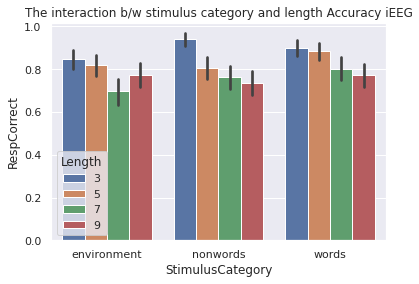

In [ ]:
# INTERACTION B/W STIMULUS CATEGORY AND LENGTH
sns.barplot(x='StimulusCategory', y='RespCorrect', hue='Length', data = ieeg_)
pl.title('The interaction b/w stimulus category and length Accuracy iEEG');

print('Nonwords')
subset = ieeg_[ieeg_['StimulusCategory'] == 'nonwords']
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 9]['RespCorrect']
print(ttest(x,y))
print('Environment')
subset = ieeg_[ieeg_['StimulusCategory'] == 'environment']
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 9]['RespCorrect']
print(ttest(x,y))
print('Words')
subset = ieeg_[ieeg_['StimulusCategory'] == 'words']
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 9]['RespCorrect']
print(ttest(x,y))

print('')
print('Length 3')
subset = ieeg_[ieeg_['Length'] == 3]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'environment']['RespCorrect']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('Length 5')
subset = ieeg_[ieeg_['Length'] == 5]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'environment']['RespCorrect']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('Length 7')
subset = ieeg_[ieeg_['Length'] == 7]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'environment']['RespCorrect']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('Length 9')
subset = ieeg_[ieeg_['Length'] == 9]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'environment']['RespCorrect']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))

### Reaction Time line plots

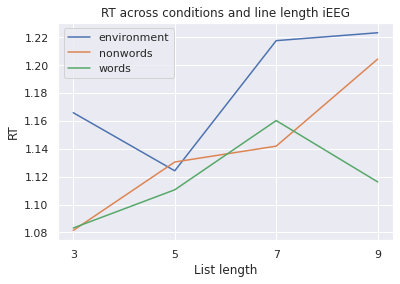

In [ ]:
pl.figure()
subset = ieeg_no_nones.groupby(['StimulusCategory', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.StimulusCategory.unique():
  x = subset[subset['StimulusCategory'] == i]
  pl.plot(x.Length, x.ReactionTime)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend(subset.StimulusCategory.unique())
pl.title('RT across conditions and line length iEEG');

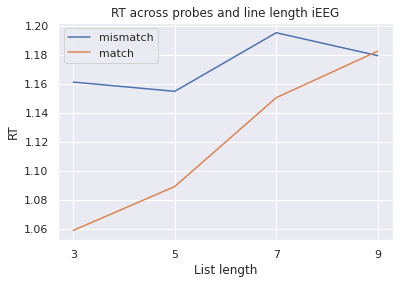

In [ ]:
pl.figure()
subset = ieeg_no_nones.groupby(['ProbeCategory', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  if i == 1:
    name = 'match'
  elif i == 0:
    name = 'mismatch'
  pl.plot(x.Length, x.ReactionTime, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend()
pl.title('RT across probes and line length iEEG');

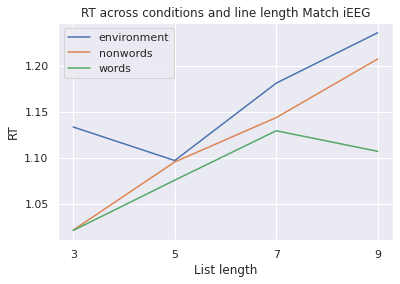

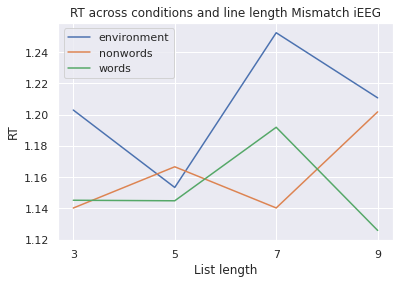

In [ ]:
# ONLY MATCH
pl.figure()
subset = ieeg_no_nones[ieeg_no_nones['ProbeCategory'] == 1].groupby(['StimulusCategory', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.StimulusCategory.unique():
  x = subset[subset['StimulusCategory'] == i]
  pl.plot(x.Length, x.ReactionTime)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend(subset.StimulusCategory.unique())
pl.title('RT across conditions and line length Match iEEG');

# ONLY MISMATCH
pl.figure()
subset = ieeg_no_nones[ieeg_no_nones['ProbeCategory'] == 0].groupby(['StimulusCategory', 'Length'])[['ReactionTime']].mean().reset_index()
for i in subset.StimulusCategory.unique():
  x = subset[subset['StimulusCategory'] == i]
  pl.plot(x.Length, x.ReactionTime)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('RT')
pl.legend(subset.StimulusCategory.unique())
pl.title('RT across conditions and line length Mismatch iEEG');

### Reaction Time bar plots

NW vs W
Ttest_indResult(statistic=1.262891485892922, pvalue=0.2067983814169355)
NW vs Environment
Ttest_indResult(statistic=-2.4172913021772855, pvalue=0.015741537147999696)
W vs Environment
Ttest_indResult(statistic=3.6887155465402737, pvalue=0.0002325430883851496)


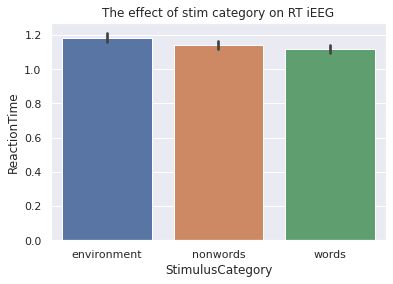

In [ ]:
# STIMULUS CATEGORY ON ACCURACY
sns.barplot(x='StimulusCategory', y='ReactionTime', data = ieeg_no_nones)
pl.title('The effect of stim category on RT iEEG');

print('NW vs W')
x, y = ieeg_no_nones[ieeg_no_nones['StimulusCategory'] == 'nonwords']['ReactionTime'], ieeg_no_nones[ieeg_no_nones['StimulusCategory'] == 'words']['ReactionTime']
print(ttest(x,y))
print('NW vs Environment')
x, y = ieeg_no_nones[ieeg_no_nones['StimulusCategory'] == 'nonwords']['ReactionTime'], ieeg_no_nones[ieeg_no_nones['StimulusCategory'] == 'environment']['ReactionTime']
print(ttest(x,y))
print('W vs Environment')
x, y = ieeg_no_nones[ieeg_no_nones['StimulusCategory'] == 'environment']['ReactionTime'], ieeg_no_nones[ieeg_no_nones['StimulusCategory'] == 'words']['ReactionTime']
print(ttest(x,y))

0 vs 1
Ttest_indResult(statistic=3.6134038155183315, pvalue=0.00030799750033640264)


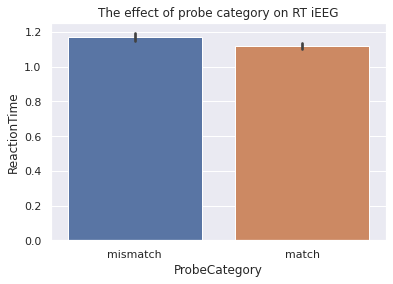

In [ ]:
# PROBE CATEGORY ON ACCURACY
ax = sns.barplot(x='ProbeCategory', y='ReactionTime', data = ieeg_no_nones)
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The effect of probe category on RT iEEG');

print('0 vs 1')
x, y = ieeg_no_nones[ieeg_no_nones['ProbeCategory'] == 0]['ReactionTime'], ieeg_no_nones[ieeg_no_nones['ProbeCategory'] == 1]['ReactionTime']
print(ttest(x,y))

Length 3 vs 5
Ttest_indResult(statistic=-0.6099562394130447, pvalue=0.5419999620046856)
Length 5 vs 7
Ttest_indResult(statistic=2.5681901468130106, pvalue=0.010335111522650915)
Length 7 vs 9
Ttest_indResult(statistic=-0.39478560395065965, pvalue=0.6930660188087467)


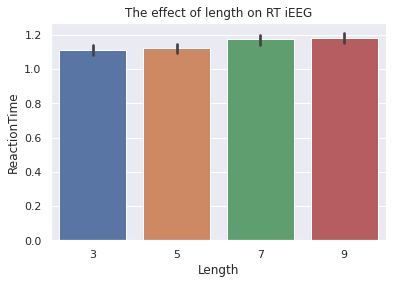

In [ ]:
# LENGTH ON ACCURACY
sns.barplot(x='Length', y='ReactionTime', data = ieeg_no_nones)
pl.title('The effect of length on RT iEEG');

print('Length 3 vs 5')
x, y = ieeg_no_nones[ieeg_no_nones['Length'] == 3]['ReactionTime'], ieeg_no_nones[ieeg_no_nones['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = ieeg_no_nones[ieeg_no_nones['Length'] == 7]['ReactionTime'], ieeg_no_nones[ieeg_no_nones['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = ieeg_no_nones[ieeg_no_nones['Length'] == 7]['ReactionTime'], ieeg_no_nones[ieeg_no_nones['Length'] == 9]['ReactionTime']
print(ttest(x,y))

0 vs 1
Nonwords
Ttest_indResult(statistic=array([1.82397111]), pvalue=array([0.06850353]))
Environment
Ttest_indResult(statistic=array([1.66858555]), pvalue=array([0.0955735]))
Words
Ttest_indResult(statistic=array([2.87344876]), pvalue=array([0.00415904]))

NW vs W vs E
ProbeType 0
W vs NW Ttest_indResult(statistic=array([-0.41512434]), pvalue=array([0.67815456]))
W vs E Ttest_indResult(statistic=array([-2.12561688]), pvalue=array([0.03383083]))
NW vs E Ttest_indResult(statistic=array([1.67088667]), pvalue=array([0.09511812]))
ProbeType 1
W vs NW Ttest_indResult(statistic=array([-1.38319459]), pvalue=array([0.16696086]))
W vs E Ttest_indResult(statistic=array([-3.13668998]), pvalue=array([0.0017672]))
NW vs E Ttest_indResult(statistic=array([1.78444253]), pvalue=array([0.07470642]))


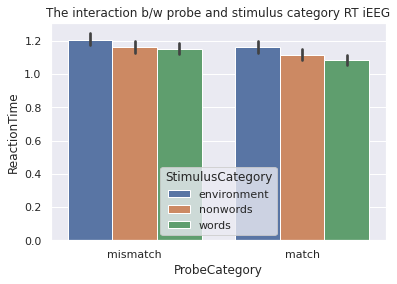

In [ ]:
# INTERACTION B/W PROBE AND STIMULUS
ax=sns.barplot(x='ProbeCategory', y='ReactionTime', hue='StimulusCategory', data = ieeg_no_nones)
ax.set_xticklabels(['mismatch','match'])
pl.title('The interaction b/w probe and stimulus category RT iEEG');

print('0 vs 1')
print('Nonwords')
subset = ieeg_no_nones[ieeg_no_nones['StimulusCategory'] == 'nonwords']
x, y = subset[subset['ProbeCategory'] == 0][['ReactionTime']], subset[subset['ProbeCategory'] == 1][['ReactionTime']]
print(ttest(x,y))
print('Environment')
subset = ieeg_no_nones[ieeg_no_nones['StimulusCategory'] == 'environment']
x, y = subset[subset['ProbeCategory'] == 0][['ReactionTime']], subset[subset['ProbeCategory'] == 1][['ReactionTime']]
print(ttest(x,y))
print('Words')
subset = ieeg_no_nones[ieeg_no_nones['StimulusCategory'] == 'words']
x, y = subset[subset['ProbeCategory'] == 0][['ReactionTime']], subset[subset['ProbeCategory'] == 1][['ReactionTime']]
print(ttest(x,y))
print('')
print('NW vs W vs E')
print('ProbeType 0')
subset = ieeg_no_nones[ieeg_no_nones['ProbeCategory'] == 0]
x, y = subset[subset['StimulusCategory'] == 'words'][['ReactionTime']], subset[subset['StimulusCategory'] == 'nonwords'][['ReactionTime']]
print('W vs NW', ttest(x,y))
x, y = subset[subset['StimulusCategory'] == 'words'][['ReactionTime']], subset[subset['StimulusCategory'] == 'environment'][['ReactionTime']]
print('W vs E', ttest(x,y))
x, y = subset[subset['StimulusCategory'] == 'environment'][['ReactionTime']], subset[subset['StimulusCategory'] == 'nonwords'][['ReactionTime']]
print('NW vs E', ttest(x,y))

print('ProbeType 1')
subset = ieeg_no_nones[ieeg_no_nones['ProbeCategory'] == 1]
x, y = subset[subset['StimulusCategory'] == 'words'][['ReactionTime']], subset[subset['StimulusCategory'] == 'nonwords'][['ReactionTime']]
print('W vs NW', ttest(x,y))
x, y = subset[subset['StimulusCategory'] == 'words'][['ReactionTime']], subset[subset['StimulusCategory'] == 'environment'][['ReactionTime']]
print('W vs E', ttest(x,y))
x, y = subset[subset['StimulusCategory'] == 'environment'][['ReactionTime']], subset[subset['StimulusCategory'] == 'nonwords'][['ReactionTime']]
print('NW vs E', ttest(x,y))

Mismatch
Length 3 vs 5
Ttest_indResult(statistic=0.21296188625929907, pvalue=0.8314265159089169)
Length 5 vs 7
Ttest_indResult(statistic=1.4239592228984856, pvalue=0.15494722602537347)
Length 7 vs 9
Ttest_indResult(statistic=0.5463355984699786, pvalue=0.5850243674989597)
Match
Length 3 vs 5
Ttest_indResult(statistic=-1.1076473583619146, pvalue=0.26842704763548536)
Length 5 vs 7
Ttest_indResult(statistic=2.188975420659125, pvalue=0.028955806750511643)
Length 7 vs 9
Ttest_indResult(statistic=-1.0944815449675556, pvalue=0.2741490577437703)
Length 3
Ttest_indResult(statistic=3.490761487677921, pvalue=0.000515820353146881)
Length 5
Ttest_indResult(statistic=2.343747433182841, pvalue=0.019398425346283516)
Length 7
Ttest_indResult(statistic=1.5800194163271064, pvalue=0.11459150671894708)
Length 9
Ttest_indResult(statistic=-0.10298194835767019, pvalue=0.9180090125055533)


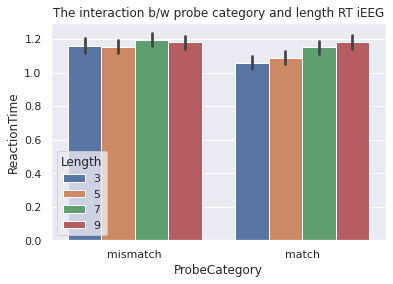

In [ ]:
# INTERACTION B/W PROBE CATEGORY AND LENGTH
ax = sns.barplot(x='ProbeCategory', y='ReactionTime', hue='Length', data = ieeg_no_nones)
ax.set_xticklabels(['mismatch', 'match'])
pl.title('The interaction b/w probe category and length RT iEEG');

print('Mismatch')
subset = ieeg_no_nones[ieeg_no_nones['ProbeCategory'] == 0]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 9]['ReactionTime']
print(ttest(x,y))

print('Match')
subset = ieeg_no_nones[ieeg_no_nones['ProbeCategory'] == 1]
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 9]['ReactionTime']
print(ttest(x,y))

print('Length 3')
subset = ieeg_no_nones[ieeg_no_nones['Length'] == 3]
x, y = subset[subset['ProbeCategory'] == 0]['ReactionTime'], subset[subset['ProbeCategory'] == 1]['ReactionTime']
print(ttest(x,y))
print('Length 5')
subset = ieeg_no_nones[ieeg_no_nones['Length'] == 5]
x, y = subset[subset['ProbeCategory'] == 0]['ReactionTime'], subset[subset['ProbeCategory'] == 1]['ReactionTime']
print(ttest(x,y))
print('Length 7')
subset = ieeg_no_nones[ieeg_no_nones['Length'] == 7]
x, y = subset[subset['ProbeCategory'] == 0]['ReactionTime'], subset[subset['ProbeCategory'] == 1]['ReactionTime']
print(ttest(x,y))
print('Length 9')
subset = ieeg_no_nones[ieeg_no_nones['Length'] == 9]
x, y = subset[subset['ProbeCategory'] == 0]['ReactionTime'], subset[subset['ProbeCategory'] == 1]['ReactionTime']
print(ttest(x,y))

Nonwords
Length 3 vs 5
Ttest_indResult(statistic=-1.4133604655249326, pvalue=0.1582751442881335)
Length 5 vs 7
Ttest_indResult(statistic=0.3413104047486954, pvalue=0.7330384771796843)
Length 7 vs 9
Ttest_indResult(statistic=-1.7702983767004428, pvalue=0.07741209256567835)
Environment
Length 3 vs 5
Ttest_indResult(statistic=1.1642868050723123, pvalue=0.24500935452910821)
Length 5 vs 7
Ttest_indResult(statistic=2.603756122076701, pvalue=0.009560315730438277)
Length 7 vs 9
Ttest_indResult(statistic=-0.14679869923950548, pvalue=0.8833602868129551)
Words
Length 3 vs 5
Ttest_indResult(statistic=-0.7830877065598132, pvalue=0.4340069334295884)
Length 5 vs 7
Ttest_indResult(statistic=1.4518343578141568, pvalue=0.14727191871041956)
Length 7 vs 9
Ttest_indResult(statistic=1.3649568781540076, pvalue=0.17296732494265513)

Length 3
W vs NW
Ttest_indResult(statistic=0.05094145876072807, pvalue=0.9593959344090295)
W vs E
Ttest_indResult(statistic=-2.2504437228453202, pvalue=0.024952368532290284)
E vs 

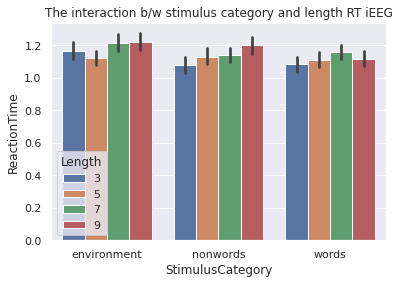

In [ ]:
# INTERACTION B/W STIMULUS CATEGORY AND LENGTH
sns.barplot(x='StimulusCategory', y='ReactionTime', hue='Length', data = ieeg_no_nones)
pl.title('The interaction b/w stimulus category and length RT iEEG');

print('Nonwords')
subset = ieeg_no_nones[ieeg_no_nones['StimulusCategory'] == 'nonwords']
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 9]['ReactionTime']
print(ttest(x,y))
print('Environment')
subset = ieeg_no_nones[ieeg_no_nones['StimulusCategory'] == 'environment']
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 9]['ReactionTime']
print(ttest(x,y))
print('Words')
subset = ieeg_no_nones[ieeg_no_nones['StimulusCategory'] == 'words']
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 5]['ReactionTime']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['ReactionTime'], subset[subset['Length'] == 9]['ReactionTime']
print(ttest(x,y))

print('')
print('Length 3')
subset = ieeg_no_nones[ieeg_no_nones['Length'] == 3]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['ReactionTime'], subset[subset['StimulusCategory'] == 'nonwords']['ReactionTime']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['ReactionTime'], subset[subset['StimulusCategory'] == 'environment']['ReactionTime']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['ReactionTime'], subset[subset['StimulusCategory'] == 'nonwords']['ReactionTime']
print(ttest(x,y))
print('Length 5')
subset = ieeg_no_nones[ieeg_no_nones['Length'] == 5]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['ReactionTime'], subset[subset['StimulusCategory'] == 'nonwords']['ReactionTime']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['ReactionTime'], subset[subset['StimulusCategory'] == 'environment']['ReactionTime']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['ReactionTime'], subset[subset['StimulusCategory'] == 'nonwords']['ReactionTime']
print(ttest(x,y))
print('Length 7')
subset = ieeg_no_nones[ieeg_no_nones['Length'] == 7]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['ReactionTime'], subset[subset['StimulusCategory'] == 'nonwords']['ReactionTime']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['ReactionTime'], subset[subset['StimulusCategory'] == 'environment']['ReactionTime']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['ReactionTime'], subset[subset['StimulusCategory'] == 'nonwords']['ReactionTime']
print(ttest(x,y))
print('Length 9')
subset = ieeg_no_nones[ieeg_no_nones['Length'] == 9]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['ReactionTime'], subset[subset['StimulusCategory'] == 'nonwords']['ReactionTime']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['ReactionTime'], subset[subset['StimulusCategory'] == 'environment']['ReactionTime']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['ReactionTime'], subset[subset['StimulusCategory'] == 'nonwords']['ReactionTime']
print(ttest(x,y))

### Models

**Accuracy**

In [ ]:
ieeg_data = ieeg_[[
    'StimulusCategory', 'RespCorrect', 'ReactionTime',
    'ProbeCategory', 'Trial', 'Subject', 'Length',
    'Words', 'Nonwords', 'Environment'
]]

In [ ]:
%%R -i ieeg_data
comp1<-lmer('RespCorrect ~ ProbeCategory + Length + StimulusCategory + StimulusCategory:ProbeCategory + (1|Subject)', data=ieeg_data)
comp2<-lmer('RespCorrect ~ ProbeCategory + Length + StimulusCategory + StimulusCategory:ProbeCategory + StimulusCategory:Length + (1|Subject)', data=ieeg_data)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1    9 2590.767 2643.809 -1286.384 2572.767       NA NA         NA
2   10 2591.421 2650.356 -1285.710 2571.421 1.346389  1  0.2459104


In [ ]:
tryout1 = Lmer(
    'RespCorrect ~ ProbeCategory + Length + StimulusCategory + StimulusCategory:ProbeCategory + StimulusCategory:Length + (1|Subject)',
    data = ieeg_data
)
tryout1.fit()

Formula: RespCorrect~ProbeCategory+Length+StimulusCategory+StimulusCategory:ProbeCategory+StimulusCategory:Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2680	 Groups: {'Subject': 16.0}

Log-likelihood: -1313.837 	 AIC: 2627.674

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.033
Residual               0.152  0.390

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.816,0.737,0.896,0.040,1396.632,20.185,0.000,***
ProbeCategory,0.063,0.012,0.114,0.026,2656.056,2.421,0.016,*
Length,-0.011,-0.022,0.001,0.006,2656.069,-1.866,0.062,.
StimulusCategorynonwords,0.175,0.065,0.284,0.056,2656.043,3.123,0.002,**
StimulusCategorywords,0.069,-0.041,0.179,0.056,2656.064,1.235,0.217,
ProbeCategory:StimulusCategorynonwords,-0.054,-0.127,0.018,0.037,2656.048,-1.474,0.141,
ProbeCategory:StimulusCategorywords,0.039,-0.033,0.112,0.037,2656.072,1.063,0.288,
Length:StimulusCategorynonwords,-0.021,-0.037,-0.005,0.008,2656.055,-2.522,0.012,*
Length:StimulusCategorywords,-0.007,-0.023,0.009,0.008,2656.097,-0.884,0.377,


In [ ]:
%%R -i ieeg_data
comp1<-lmer('RespCorrect ~ ProbeCategory + Length + Words + Environment + (1|Subject)', data=ieeg_data)
comp2<-lmer('RespCorrect ~ ProbeCategory + Length + Words + Environment + Nonwords + (1|Subject)', data=ieeg_data)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance Chisq Df Pr..Chisq.
1    7 2478.151 2519.362 -1232.076 2464.151    NA NA         NA
2    7 2478.151 2519.362 -1232.076 2464.151     0  0         NA


**Reaction time**

In [ ]:
ieeg_rt_data = ieeg_no_nones[[
    'StimulusCategory', 'RespCorrect', 'ReactionTime',
    'ProbeCategory', 'Trial', 'Subject', 'Length',
    'Words', 'Nonwords', 'Environment'
]]

In [ ]:
%%R -i ieeg_rt_data
comp1<-lmer('ReactionTime ~ StimulusCategory + ProbeCategory + Length + ProbeCategory:Length + (1|Subject)', data=ieeg_rt_data)
comp2<-lmer('ReactionTime ~ StimulusCategory + ProbeCategory + Length + ProbeCategory:Length + StimulusCategory:ProbeCategory + (1|Subject)', data=ieeg_rt_data)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1    8 974.5085 1021.344 -479.2542 958.5085       NA NA         NA
2   10 977.3618 1035.906 -478.6809 957.3618 1.146717  2  0.5636294


In [ ]:
tryout1 = Lmer(
    'ReactionTime ~ StimulusCategory + ProbeCategory + Length + ProbeCategory:Length + (1|Subject)',
    data = ieeg_rt_data
)
tryout1.fit()

Formula: ReactionTime~StimulusCategory+ProbeCategory+Length+ProbeCategory:Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2577	 Groups: {'Subject': 16.0}

Log-likelihood: -501.044 	 AIC: 1002.088

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.054  0.232
Residual               0.083  0.288

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.187,1.064,1.310,0.063,20.561,18.853,0.000,***
StimulusCategorynonwords,-0.046,-0.073,-0.019,0.014,2556.014,-3.311,0.001,***
StimulusCategorywords,-0.067,-0.095,-0.040,0.014,2556.027,-4.852,0.000,***
ProbeCategory,-0.160,-0.224,-0.096,0.033,2556.019,-4.918,0.000,***
Length,0.005,-0.002,0.012,0.004,2556.013,1.321,0.186,
ProbeCategory:Length,0.017,0.008,0.027,0.005,2556.016,3.443,0.001,***


### Imaginability and frequency

In [ ]:
ieeg_words = ieeg[ieeg['StimulusCategory'] == 'words']

In [ ]:
ieeg_words['ProbeFreqLog'] = np.log10(ieeg_words['ProbeFreq'])

<ipython-input-26-d33be638e39f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ieeg_words['ProbeFreqLog'] = np.log10(ieeg_words['ProbeFreq'])


Let's look into the probes first.

In [ ]:
ieeg_words.groupby(['RespCorrect', 'ProbeCategory'])[['block']].count()

block
RespCorrect ProbeCategory       
0           0                 94
            1                 52
1           0                325
            1                366

80.75
0.55


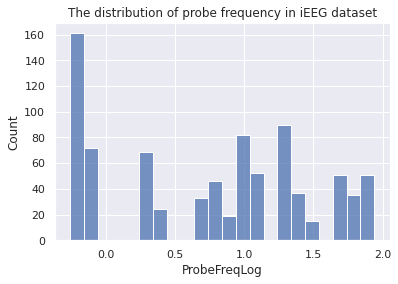

In [ ]:
sns.histplot(ieeg_words.ProbeFreqLog, binwidth=0.1)
pl.title('The distribution of probe frequency in iEEG dataset');
print(ieeg_words.ProbeFreq.max())
print(ieeg_words.ProbeFreq.min())

6.8
3.1


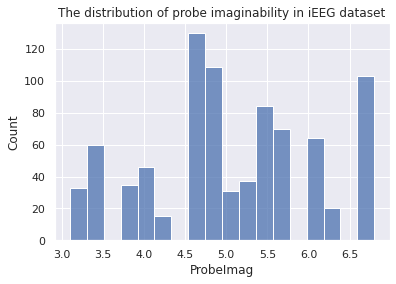

In [ ]:
sns.histplot(ieeg_words.ProbeImag)
pl.title('The distribution of probe imaginability in iEEG dataset');
print(ieeg_words.ProbeImag.max())
print(ieeg_words.ProbeImag.min())

In [ ]:
x = (ieeg_words.ProbeFreqLog.max() - ieeg_words.ProbeFreqLog.min())/3
print(ieeg_words.ProbeFreqLog.min() + x)
print(ieeg_words.ProbeFreqLog.min() + 2*x)
print(ieeg_words.ProbeFreqLog.min() + 3*x)

0.46262263666387604
1.1848825838335082
1.9071425310031402


In [ ]:
freq_cat = []
probe_freq = ieeg_words.ProbeFreqLog.values
for i in probe_freq:
  if i < 0.5:
    freq_cat.append('low')
  elif 0.5 <= i <= 1.2:
    freq_cat.append('middle')
  elif i > 1.2:
    freq_cat.append('high')
print(len(probe_freq))
print(len(freq_cat))

893
893


In [ ]:
imag_cat = []
probe_imag = ieeg_words.ProbeImag.values
for i in probe_imag:
  if i < 4.3:
    imag_cat.append('low')
  elif 4.3 <= i <= 5.5:
    imag_cat.append('middle')
  elif i > 5.5:
    imag_cat.append('high')
print(len(probe_imag))
print(len(imag_cat))

893
893


In [ ]:
ieeg_words['FreqCat'] = freq_cat
ieeg_words['ImagCat'] = imag_cat

<ipython-input-172-ed5527c393f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ieeg_words['FreqCat'] = freq_cat
<ipython-input-172-ed5527c393f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ieeg_words['ImagCat'] = imag_cat


Ttest_indResult(statistic=0.27825877131490634, pvalue=0.7809829138528976)
Ttest_indResult(statistic=1.0179712060287223, pvalue=0.3093051678595217)
Ttest_indResult(statistic=-0.9311310025737777, pvalue=0.352171417810899)


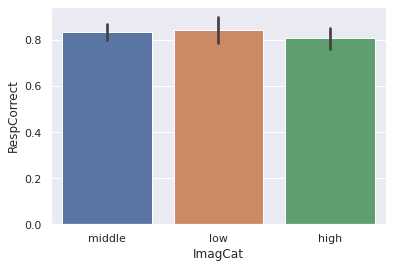

In [ ]:
sns.barplot(x='ImagCat', y='RespCorrect', data = ieeg_words);

x, y = ieeg_words[ieeg_words['ImagCat'] == 'low']['RespCorrect'], ieeg_words[ieeg_words['ImagCat'] == 'middle']['RespCorrect']
print(ttest(x,y))
x, y = ieeg_words[ieeg_words['ImagCat'] == 'low']['RespCorrect'], ieeg_words[ieeg_words['ImagCat'] == 'high']['RespCorrect']
print(ttest(x,y))
x, y = ieeg_words[ieeg_words['ImagCat'] == 'high']['RespCorrect'], ieeg_words[ieeg_words['ImagCat'] == 'middle']['RespCorrect']
print(ttest(x,y))

Ttest_indResult(statistic=-0.11122755894000459, pvalue=0.9114987753897814)
Ttest_indResult(statistic=-2.2373979872310357, pvalue=0.02577211815878548)
Ttest_indResult(statistic=2.5063091700214017, pvalue=0.012485412518962477)


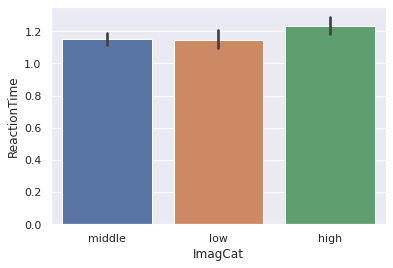

In [ ]:
sns.barplot(x='ImagCat', y='ReactionTime', data = ieeg_words);

x, y = ieeg_words[ieeg_words['ImagCat'] == 'low']['ReactionTime'], ieeg_words[ieeg_words['ImagCat'] == 'middle']['ReactionTime']
print(ttest(x,y))
x, y = ieeg_words[ieeg_words['ImagCat'] == 'low']['ReactionTime'], ieeg_words[ieeg_words['ImagCat'] == 'high']['ReactionTime']
print(ttest(x,y))
x, y = ieeg_words[ieeg_words['ImagCat'] == 'high']['ReactionTime'], ieeg_words[ieeg_words['ImagCat'] == 'middle']['ReactionTime']
print(ttest(x,y))

Ttest_indResult(statistic=1.1910156496797506, pvalue=0.24013876151868283)
Ttest_indResult(statistic=1.3399805436699403, pvalue=0.18223440328989782)
Ttest_indResult(statistic=0.3742237945505739, pvalue=0.7094362323435719)


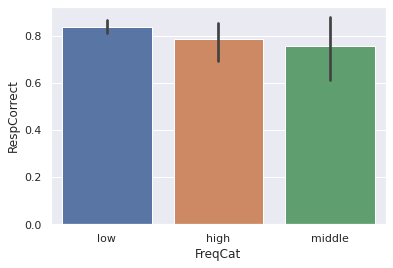

In [ ]:
sns.barplot(x='FreqCat', y='RespCorrect', data = ieeg_words);

x, y = ieeg_words[ieeg_words['FreqCat'] == 'low']['RespCorrect'], ieeg_words[ieeg_words['FreqCat'] == 'middle']['RespCorrect']
print(ttest(x,y))
x, y = ieeg_words[ieeg_words['FreqCat'] == 'low']['RespCorrect'], ieeg_words[ieeg_words['FreqCat'] == 'high']['RespCorrect']
print(ttest(x,y))
x, y = ieeg_words[ieeg_words['FreqCat'] == 'high']['RespCorrect'], ieeg_words[ieeg_words['FreqCat'] == 'middle']['RespCorrect']
print(ttest(x,y))

Ttest_indResult(statistic=-0.7813494788462693, pvalue=0.43878274394529204)
Ttest_indResult(statistic=0.7251056597856422, pvalue=0.4693240179784066)
Ttest_indResult(statistic=-1.0623580917605226, pvalue=0.2925077701597922)


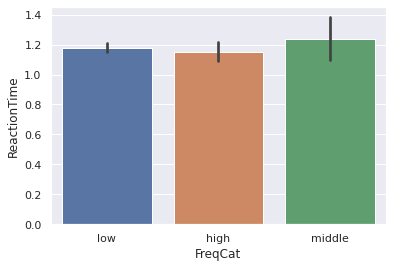

In [ ]:
sns.barplot(x='FreqCat', y='ReactionTime', data = ieeg_words);

x, y = ieeg_words[ieeg_words['FreqCat'] == 'low']['ReactionTime'], ieeg_words[ieeg_words['FreqCat'] == 'middle']['ReactionTime']
print(ttest(x,y))
x, y = ieeg_words[ieeg_words['FreqCat'] == 'low']['ReactionTime'], ieeg_words[ieeg_words['FreqCat'] == 'high']['ReactionTime']
print(ttest(x,y))
x, y = ieeg_words[ieeg_words['FreqCat'] == 'high']['ReactionTime'], ieeg_words[ieeg_words['FreqCat'] == 'middle']['ReactionTime']
print(ttest(x,y))

In [ ]:
ieeg_w = ieeg_words[[
    'RespCorrect', 'ReactionTime',
    'ProbeCategory', 'Trial', 'Subject', 'Length',
    'ImagCat', 'FreqCat', 'ProbeImag', 'ProbeFreq'
]]

In [ ]:
%%R -i ieeg_w
comp1<-lmer('RespCorrect ~ Length + ProbeCategory + (1|Subject)', data=ieeg_w)
comp2<-lmer('RespCorrect ~ Length + ProbeCategory + ProbeFreq + (1|Subject)', data=ieeg_w)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1    5 776.8720 800.8449 -383.4360 766.8720       NA NA         NA
2    6 777.8125 806.5800 -382.9063 765.8125 1.059473  1  0.3033353


In [ ]:
ieeg_words[ieeg_words['Subject'] == 'D42'].groupby(['FreqCat'])[['Trial']].count()

,Trial
FreqCat,
high,8
low,46
middle,2


D32
D35
D38
D39
D42


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


D47
D53
D55
D57
D63
D69
D71
D64
D65
D73
D77


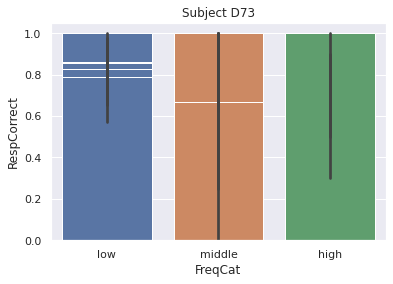

In [ ]:
subjects = ieeg_words.Subject.unique()
for i in subjects:
  print(i)
  subset = ieeg_words[ieeg_words['Subject'] == i]
  x = subset[subset['FreqCat'] == 'low']['RespCorrect']
  y = subset[subset['FreqCat'] == 'middle']['RespCorrect']
  z = subset[subset['FreqCat'] == 'high']['RespCorrect']
  a = ttest(x,y)
  b = ttest(y,z)
  c = ttest(x,z)
  if a[1] < 0.05 or b[1] < 0.05 or c[1] < 0.05:
    sns.barplot(x='FreqCat', y='RespCorrect', data = subset)
    pl.title('Subject ' + i);

D32
D35
D38
D39
D42
D47
D53
D55
D57
D63
D69
D71
D64
D65
D73
D77


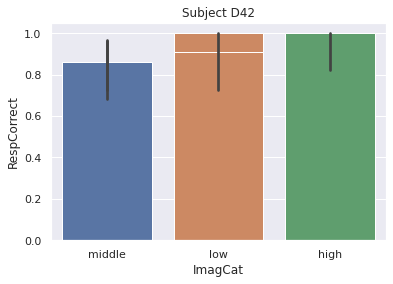

In [ ]:
subjects = ieeg_words.Subject.unique()
for i in subjects:
  print(i)
  subset = ieeg_words[ieeg_words['Subject'] == i]
  x = subset[subset['ImagCat'] == 'low']['RespCorrect']
  y = subset[subset['ImagCat'] == 'middle']['RespCorrect']
  z = subset[subset['ImagCat'] == 'high']['RespCorrect']
  a = ttest(x,y)
  b = ttest(y,z)
  c = ttest(x,z)
  if a[1] < 0.05 or b[1] < 0.05 or c[1] < 0.05:
    sns.barplot(x='ImagCat', y='RespCorrect', data = subset)
    pl.title('Subject ' + i);

Let's look closer to stimulus category now

In [ ]:
ieeg_words.StimFreq.values[:10]

array([list([0.55, 44.0, 1.86, 0.75, 10.82]),
       list([44.0, 50.96, 0.61, 11.84, 0.55]), list([0.75, 20.94, 0.82]),
       list([2.16, 0.55, 23.88, 5.31, 0.63, 50.96, 9.96]),
       list([28.78, 2.16, 11.84]),
       list([20.16, 10.9, 5.31, 28.78, 0.63, 58.31, 44.0, 21.41, 0.75]),
       list([5.71, 0.61, 11.84, 7.18, 10.9, 1.86, 0.63, 5.31, 0.82]),
       list([1.86, 0.61, 20.16, 0.82, 7.18, 9.96, 5.31]),
       list([28.78, 0.55, 0.63, 11.84, 23.88]),
       list([0.75, 21.41, 44.0, 2.37, 5.71])], dtype=object)

In [ ]:
ieeg_words.head()

,block,ReactionTime,Resp,RespCorrect,stimulusSounds_idx,ProbeCategory,probeSound_idx,StimulusCategory,Trial,stimulusSounds_name,...,Subject,Length,Words,Nonwords,Environment,ProbeFreq,ProbeImag,StimFreq,StimImag,ProbeFreqLog
618,1,1.314829,No,1,"[46, 36, 42, 34, 29]",0,2,words,2,"[tunic, madam, quota, glacier, comic]",...,D32,5,1,0,0,0.63,4.7,"[0.55, 44.0, 1.86, 0.75, 10.82]","[5.6, 5.6, 3.8, 6.6, 5.4]",-0.200659
619,1,0.894159,Yes,1,"[36, 33, 28, 27, 46]",1,3,words,3,"[madam, duty, cherub, chapter, tunic]",...,D32,5,1,0,0,11.84,4.9,"[44.0, 50.96, 0.61, 11.84, 0.55]","[5.6, 4.0, 3.5, 4.9, 5.6]",1.073352
621,1,0.942509,Yes,1,"[34, 43, 41]",1,17,words,5,"[glacier, rabbit, porridge]",...,D32,3,1,0,0,0.82,5.1,"[0.75, 20.94, 0.82]","[6.6, 6.8, 5.1]",-0.086186
623,1,1.211378,Yes,0,"[31, 46, 48, 45, 26, 33, 39]",0,4,words,7,"[cushion, tunic, vision, topic, chalice, duty,...",...,D32,7,1,0,0,0.61,3.5,"[2.16, 0.55, 23.88, 5.31, 0.63, 50.96, 9.96]","[6.1, 5.6, 5.2, 3.1, 4.7, 4.0, 6.3]",-0.214670
624,1,2.051226,No,1,"[38, 31, 27]",0,2,words,8,"[member, cushion, chapter]",...,D32,3,1,0,0,0.63,4.7,"[28.78, 2.16, 11.84]","[4.3, 6.1, 4.9]",-0.200659


 Let's look at hits and misses for both categories together for M and MM and then separately.

Text(0.5, 1.0, 'The distribution of Imaginability for misses')

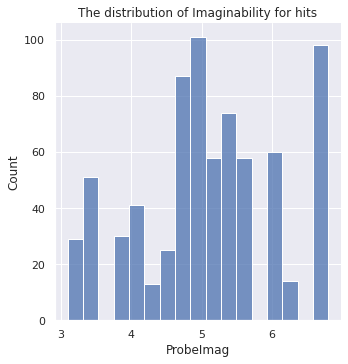

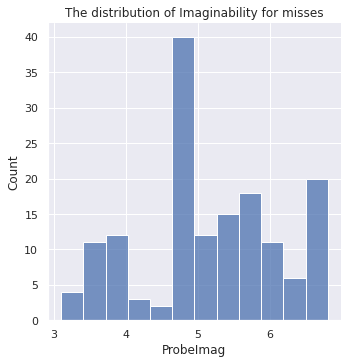

In [ ]:
# imagenability
sns.displot(
    ieeg_words[ieeg_words['RespCorrect'] == 1]['ProbeImag']
);
pl.title('The distribution of Imaginability for hits');

sns.displot(
    ieeg_words[ieeg_words['RespCorrect'] == 0]['ProbeImag']
);
pl.title('The distribution of Imaginability for misses')

In [ ]:
ieeg_words.groupby(['RespCorrect', 'ProbeCategory'])[['block']].count()

block
RespCorrect ProbeCategory       
0           0                100
            1                 54
1           0                347
            1                392

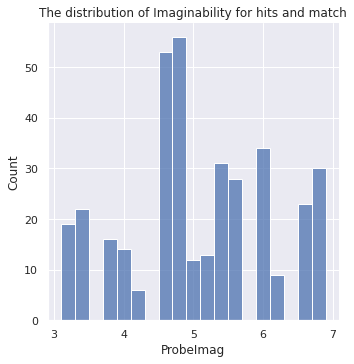

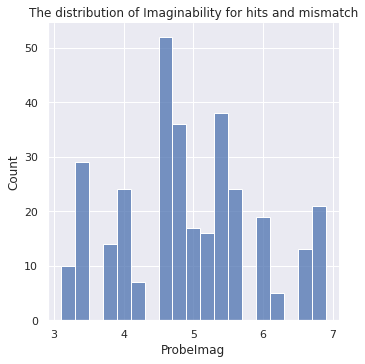

In [ ]:
# imagenability match vs mismatch
sns.displot(
    ieeg_words[(ieeg_words['RespCorrect'] == 1) & (ieeg_words['ProbeCategory'] == 1)]['ProbeImag'],
    binwidth=0.2
)
pl.title('The distribution of Imaginability for hits and match');

sns.displot(
    ieeg_words[(ieeg_words['RespCorrect'] == 1) & (ieeg_words['ProbeCategory'] == 0)]['ProbeImag'],
    binwidth=0.2
)
pl.title('The distribution of Imaginability for hits and mismatch');

Text(0.5, 1.0, 'The interaction b/w probe and imaginability')

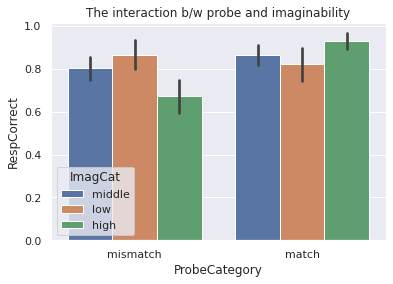

In [ ]:
ax=sns.barplot(x='ProbeCategory', y='RespCorrect', hue='ImagCat',
            data=ieeg_words)
ax.set_xticklabels(['mismatch','match'])
pl.title('The interaction b/w probe and imaginability')

In [ ]:
print('Mismatch')
sub = ieeg_words[ieeg_words['ProbeCategory'] == 0]
x, y = sub[sub['ImagCat'] == 'middle']['RespCorrect'], sub[sub['ImagCat'] == 'low']['RespCorrect']
print(ttest(x,y))
x, y = sub[sub['ImagCat'] == 'middle']['RespCorrect'], sub[sub['ImagCat'] == 'high']['RespCorrect']
print(ttest(x,y))
x, y = sub[sub['ImagCat'] == 'high']['RespCorrect'], sub[sub['ImagCat'] == 'low']['RespCorrect']
print(ttest(x,y))
print('Match')
sub = ieeg_words[ieeg_words['ProbeCategory'] == 1]
x, y = sub[sub['ImagCat'] == 'middle']['RespCorrect'], sub[sub['ImagCat'] == 'low']['RespCorrect']
print(ttest(x,y))
x, y = sub[sub['ImagCat'] == 'middle']['RespCorrect'], sub[sub['ImagCat'] == 'high']['RespCorrect']
print(ttest(x,y))
x, y = sub[sub['ImagCat'] == 'high']['RespCorrect'], sub[sub['ImagCat'] == 'low']['RespCorrect']
print(ttest(x,y))

Mismatch
Ttest_indResult(statistic=-1.401271198873895, pvalue=0.16275080039126094)
Ttest_indResult(statistic=2.6890184411681664, pvalue=0.007637262893076402)
Ttest_indResult(statistic=-3.5778507598089924, pvalue=0.00042479137738299453)
Match
Ttest_indResult(statistic=0.9837860771453771, pvalue=0.3268172787245981)
Ttest_indResult(statistic=-2.0785687268704454, pvalue=0.03837725883834753)
Ttest_indResult(statistic=2.4328259838816084, pvalue=0.016299575577138858)


Text(0.5, 1.0, 'The interaction b/w probe and frequency')

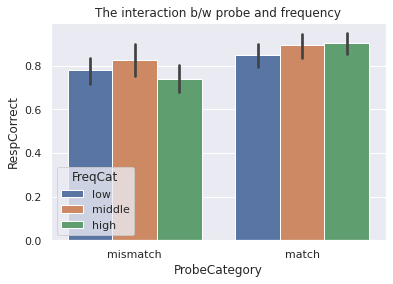

In [ ]:
ax=sns.barplot(x='ProbeCategory', y='RespCorrect', hue='FreqCat',
            data=ieeg_words)
ax.set_xticklabels(['mismatch','match'])
pl.title('The interaction b/w probe and frequency')

In [ ]:
print('Mismatch')
sub = ieeg_words[ieeg_words['ProbeCategory'] == 0]
x, y = sub[sub['FreqCat'] == 'middle']['RespCorrect'], sub[sub['FreqCat'] == 'low']['RespCorrect']
print(ttest(x,y))
x, y = sub[sub['FreqCat'] == 'middle']['RespCorrect'], sub[sub['FreqCat'] == 'high']['RespCorrect']
print(ttest(x,y))
x, y = sub[sub['FreqCat'] == 'high']['RespCorrect'], sub[sub['FreqCat'] == 'low']['RespCorrect']
print(ttest(x,y))
print('Match')
sub = ieeg_words[ieeg_words['ProbeCategory'] == 1]
x, y = sub[sub['FreqCat'] == 'middle']['RespCorrect'], sub[sub['FreqCat'] == 'low']['RespCorrect']
print(ttest(x,y))
x, y = sub[sub['FreqCat'] == 'middle']['RespCorrect'], sub[sub['FreqCat'] == 'high']['RespCorrect']
print(ttest(x,y))
x, y = sub[sub['FreqCat'] == 'high']['RespCorrect'], sub[sub['FreqCat'] == 'low']['RespCorrect']
print(ttest(x,y))

Mismatch
Ttest_indResult(statistic=1.0196336535993447, pvalue=0.3088982392389181)
Ttest_indResult(statistic=1.7572159955262323, pvalue=0.08008191030625657)
Ttest_indResult(statistic=-0.8391894732825588, pvalue=0.4019740206776873)
Match
Ttest_indResult(statistic=1.2007394792112052, pvalue=0.23077666779744063)
Ttest_indResult(statistic=-0.31699909277733157, pvalue=0.7514858012061063)
Ttest_indResult(statistic=1.5290324640614459, pvalue=0.12729674353931342)


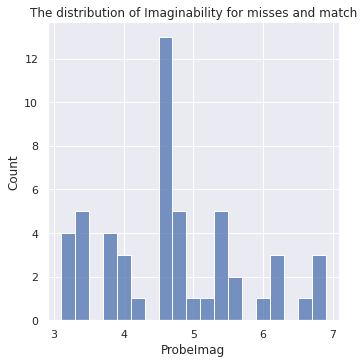

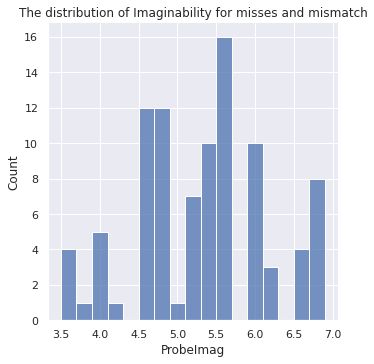

In [ ]:
# imagenability match vs mismatch
sns.displot(
    ieeg_words[(ieeg_words['RespCorrect'] == 0) & (ieeg_words['ProbeCategory'] == 1)]['ProbeImag'],
    binwidth=0.2
)
pl.title('The distribution of Imaginability for misses and match');

sns.displot(
    ieeg_words[(ieeg_words['RespCorrect'] == 0) & (ieeg_words['ProbeCategory'] == 0)]['ProbeImag'],
    binwidth=0.2
)
pl.title('The distribution of Imaginability for misses and mismatch');

Text(0.5, 1.0, 'The distribution of frequency for misses')

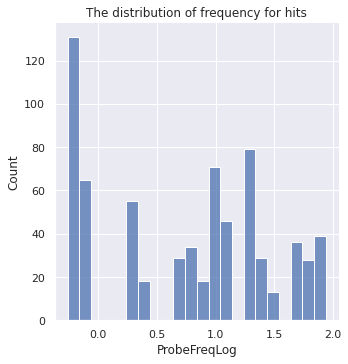

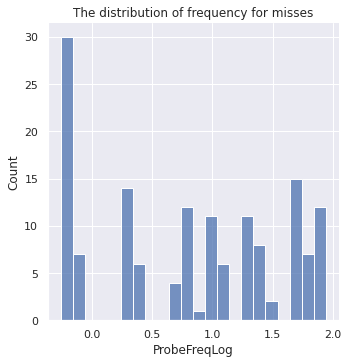

In [ ]:
# frequency
sns.displot(
    ieeg_words[ieeg_words['RespCorrect'] == 1]['ProbeFreqLog'],
    binwidth=0.1
);
pl.title('The distribution of frequency for hits');

sns.displot(
    ieeg_words[ieeg_words['RespCorrect'] == 0]['ProbeFreqLog'],
    binwidth=0.1
);
pl.title('The distribution of frequency for misses')

In [ ]:
ieeg_words.groupby(['RespCorrect', 'ProbeCategory'])[['block']].count()

block
RespCorrect ProbeCategory       
0           0                100
            1                 54
1           0                347
            1                392

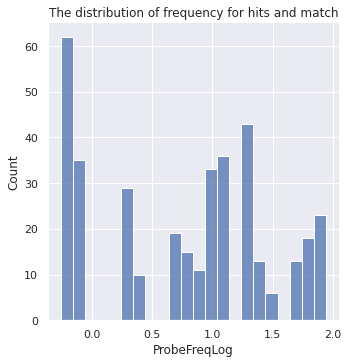

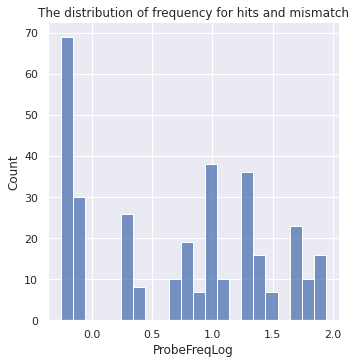

In [ ]:
# frequency match vs mismatch
sns.displot(
    ieeg_words[(ieeg_words['RespCorrect'] == 1) & (ieeg_words['ProbeCategory'] == 1)]['ProbeFreqLog'],
    binwidth=0.1
)
pl.title('The distribution of frequency for hits and match');

sns.displot(
    ieeg_words[(ieeg_words['RespCorrect'] == 1) & (ieeg_words['ProbeCategory'] == 0)]['ProbeFreqLog'],
    binwidth=0.1
)
pl.title('The distribution of frequency for hits and mismatch');

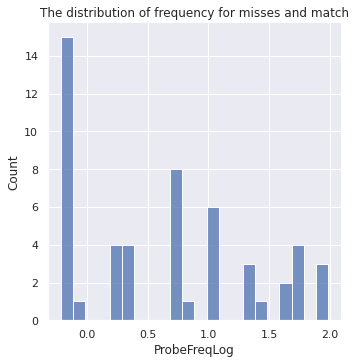

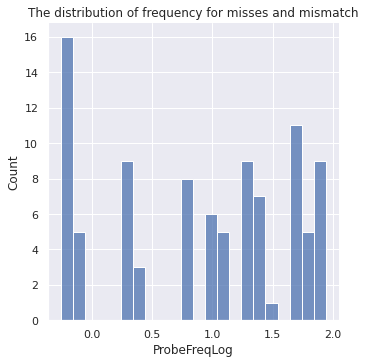

In [ ]:
# frequency match vs mismatch
sns.displot(
    ieeg_words[(ieeg_words['RespCorrect'] == 0) & (ieeg_words['ProbeCategory'] == 1)]['ProbeFreqLog'],
    binwidth=0.1
)
pl.title('The distribution of frequency for misses and match');

sns.displot(
    ieeg_words[(ieeg_words['RespCorrect'] == 0) & (ieeg_words['ProbeCategory'] == 0)]['ProbeFreqLog'],
    binwidth=0.1
)
pl.title('The distribution of frequency for misses and mismatch');

### Models new

In [ ]:
ieeg_.groupby(['StimulusCategory'])[['ProbeCategory']].count()

,ProbeCategory
StimulusCategory,
environment,893
nonwords,894
words,893


In [ ]:
x = (ieeg_words.ProbeFreqLog.max() - ieeg_words.ProbeFreqLog.min())/3
print(ieeg_words.ProbeFreqLog.min() + x)
print(ieeg_words.ProbeFreqLog.min() + 2*x)
print(ieeg_words.ProbeFreqLog.min() + 3*x)

0.46262263666387604
1.1848825838335082
1.9071425310031402


In [ ]:
ieeg_words.groupby(['FreqCat'])[['ProbeCategory']].count()

,ProbeCategory
FreqCat,
high,297
low,346
middle,250


In [ ]:
ieeg_words.groupby(['ImagCat'])[['ProbeCategory']].count()

,ProbeCategory
ImagCat,
high,285
low,179
middle,429


In [ ]:
ieeg_data = ieeg_[[
    'StimulusCategory', 'RespCorrect', 'ReactionTime',
    'ProbeCategory', 'Trial', 'Subject', 'Length',
    'Words', 'Nonwords', 'Environment', 'ProbeFreqLog', 'ProbeImag'
]]

In [ ]:
xx = ieeg_data[(ieeg_data['Words'] == 1) & (ieeg_data['ProbeFreqLog'] > 0.5)].index.tolist()
len(xx)

547

In [ ]:
for i in xx:
  ieeg_data.drop([i], axis=0, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
ieeg_data.head()

,StimulusCategory,RespCorrect,ReactionTime,ProbeCategory,Trial,Subject,Length,Words,Nonwords,Environment,ProbeFreqLog,ProbeImag
616,nonwords,1,1.227901,0,0,D32,5,0,1,0,NaN,NaN
617,environment,0,0.953294,0,1,D32,9,0,0,1,NaN,NaN
618,words,1,1.314829,0,2,D32,5,1,0,0,-0.200659,4.7
620,nonwords,0,0.866337,1,4,D32,5,0,1,0,NaN,NaN
621,words,1,0.942509,1,5,D32,3,1,0,0,-0.086186,5.1


In [ ]:
words = ieeg_data[ieeg_data['StimulusCategory'] == 'words']

In [ ]:
%%R -i ieeg_data
comp1<-lmer('RespCorrect ~ Length + ProbeCategory + (1|Subject)', data=ieeg_data)
comp2<-lmer('RespCorrect ~ Length + ProbeCategory + ProbeImag + (1|Subject)', data=ieeg_data)
anova(comp1, comp2)


Error in anova.merMod(comp1, comp2) : 
  models were not all fitted to the same size of dataset


RInterpreterError: ignored

In [ ]:
tryout1 = Lmer(
    'RespCorrect ~ ProbeCategory + Length + (1|Subject)',
    data = ieeg_data
)
tryout1.fit()

Formula: RespCorrect~ProbeCategory+Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 2133	 Groups: {'Subject': 16.0}

Log-likelihood: -1073.220 	 AIC: 2146.440

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.037
Residual               0.158  0.397

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.912,0.857,0.966,0.028,328.080,32.777,0.000,***
ProbeCategory,0.040,0.007,0.074,0.017,2115.833,2.353,0.019,*
Length,-0.022,-0.030,-0.015,0.004,2116.072,-5.825,0.000,***


In [ ]:
%%R -i words
comp1<-lmer('RespCorrect ~ 1 + (1|Subject)', data=words)
comp2<-lmer('RespCorrect ~ ProbeImag + (1|Subject)', data=words)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance      Chisq Df Pr..Chisq.
1    3 334.1331 345.6724 -164.0665 328.1331         NA NA         NA
2    4 336.0876 351.4734 -164.0438 328.0876 0.04549687  1   0.831093


# Combined model

In [19]:
eeg_ = eeg[['Subject', 'block', 'StimulusCategory', 'ReactionTime', 'Resp',
            'RespCorrect', 'ProbeCategory', 'Trial', 'Length',
       'Words', 'Nonwords', 'Environment', 'ProbeFreq', 'ProbeImag',
       'StimFreq', 'StimImag']]

ieeg_ = ieeg[['Subject', 'block', 'ReactionTime', 'Resp', 'RespCorrect',
              'ProbeCategory', 'StimulusCategory', 'Trial', 'Length', 'Words',
              'Nonwords', 'Environment', 'ProbeFreq',
       'ProbeImag', 'StimFreq', 'StimImag']]

In [163]:
eeg_['Patient'] = 0
ieeg_['Patient'] = 1

<ipython-input-163-c7d033409efa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eeg_['Patient'] = 0
<ipython-input-163-c7d033409efa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ieeg_['Patient'] = 1


In [198]:
environ = pd.concat([eeg_, ieeg_])

In [199]:
environ_ = environ[['Subject', 'block', 'StimulusCategory', 'ReactionTime', 'Resp',
       'RespCorrect', 'ProbeCategory', 'Trial', 'Length', 'Words', 'Nonwords',
       'Environment', 'Patient']]

In [201]:
eeg_rt = eeg_.copy()
ieeg_rt = ieeg_.copy()

In [207]:
eeg_rt = eeg_rt[eeg_rt['Resp'] != 'None']
ieeg_rt = ieeg_rt[ieeg_rt['Resp'] != 'None']

stdRT eeg

In [208]:
test = shapiro(eeg_rt['ReactionTime'].values)
if test[1] > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

Probably not Gaussian


In [209]:
normaltest(eeg_rt['ReactionTime'].values)

NormaltestResult(statistic=614.5852469689443, pvalue=3.50355783591037e-134)

In [211]:
fitted_data, fitted_lambda = boxcox(eeg_rt['ReactionTime'].values)

<ipython-input-212-c4a1b82d8979>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(eeg_rt['ReactionTime'].values, hist = False, kde = True,
<ipython-input-212-c4a1b82d8979>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fitted_data, hist = False, kde = True,


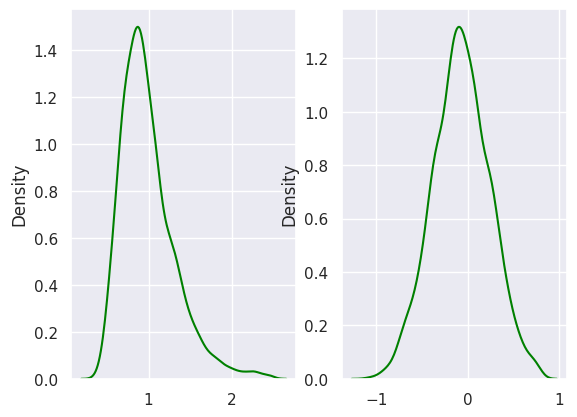

In [212]:
fig, ax = pl.subplots(1, 2)
sns.distplot(eeg_rt['ReactionTime'].values, hist = False, kde = True,
            label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,
            label = "Normal", color ="green", ax = ax[1]);

In [213]:
eeg_rt['stdRT'] = fitted_data

<ipython-input-213-09e45f0a8fb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eeg_rt['stdRT'] = fitted_data


stdRT ieeg

In [219]:
test = shapiro(ieeg_rt['ReactionTime'].values)
if test[1] > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

Probably not Gaussian


In [220]:
normaltest(ieeg_rt['ReactionTime'].values)

NormaltestResult(statistic=344.9333858257245, pvalue=1.255067130625201e-75)

In [221]:
fitted_data, fitted_lambda = boxcox(ieeg_rt['ReactionTime'].values)

<ipython-input-222-90436d529b76>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ieeg_rt['ReactionTime'].values, hist = False, kde = True,
<ipython-input-222-90436d529b76>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fitted_data, hist = False, kde = True,


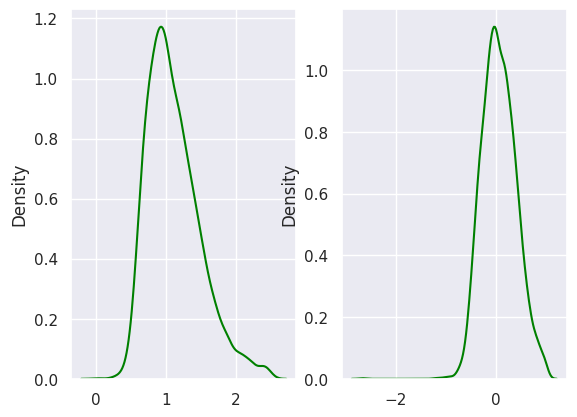

In [222]:
fig, ax = pl.subplots(1, 2)
sns.distplot(ieeg_rt['ReactionTime'].values, hist = False, kde = True,
            label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,
            label = "Normal", color ="green", ax = ax[1]);

In [223]:
ieeg_rt['stdRT'] = fitted_data

In [249]:
environ_rt = pd.concat([eeg_rt, ieeg_rt])

In [250]:
environ_rt.head()

,Subject,block,StimulusCategory,ReactionTime,Resp,RespCorrect,ProbeCategory,Trial,Length,Words,Nonwords,Environment,ProbeFreq,ProbeImag,StimFreq,StimImag,Patient,stdRT
0,E32,1,nonwords,1.160933,No,1,0,0,3,0,1,0,NaN,NaN,NaN,NaN,0,0.145953
1,E32,1,environment,0.962195,Yes,1,1,1,3,0,0,1,NaN,NaN,NaN,NaN,0,-0.038761
2,E32,1,words,0.847072,Yes,1,1,2,3,1,0,0,2.16,6.1,"[2.16, 0.55, 23.88]","[6.1, 5.6, 5.2]",0,-0.170145
3,E32,1,nonwords,1.023422,Yes,1,1,3,7,0,1,0,NaN,NaN,NaN,NaN,0,0.023072
4,E32,1,nonwords,1.607325,Yes,1,1,4,3,0,1,0,NaN,NaN,NaN,NaN,0,0.442525


## Accuracy model

In [173]:
id_mapping = {id: i for i, id in enumerate(environ_['Subject'].unique())}

# Replace the string IDs with integers in the 'Subject' column
environ_['Subject_new'] = environ_['Subject'].map(id_mapping)

<ipython-input-173-09a15a78fec9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  environ_['Subject_new'] = environ_['Subject'].map(id_mapping)


In [ ]:
environ_.head()

,Subject,block,StimulusCategory,ReactionTime,Resp,RespCorrect,ProbeCategory,Trial,Length,Words,Nonwords,Environment,Patient,Subject_new
0,E32,1,nonwords,1.160933,No,1,0,0,3,0,1,0,0,0
1,E32,1,environment,0.962195,Yes,1,1,1,3,0,0,1,0,0
2,E32,1,words,0.847072,Yes,1,1,2,3,1,0,0,0,0
3,E32,1,nonwords,1.023422,Yes,1,1,3,7,0,1,0,0,0
4,E32,1,nonwords,1.607325,Yes,1,1,4,3,0,1,0,0,0


In [ ]:
formula1 = 'RespCorrect ~ Length + ProbeCategory + (1 | Subject_new)'
formula2 = 'RespCorrect ~ Length + ProbeCategory + Length:ProbeCategory + (1 | Subject_new)'

In [ ]:
envir_fit1 = smf.mixedlm(formula1, data=environ_, groups=environ_['Subject_new'])
result1 = envir_fit1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
envir_fit2 = smf.mixedlm(formula2, data=environ_, groups=environ_['Subject_new'])
result2 = envir_fit2.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
log_likelihood1 = result1.llf
log_likelihood2 = result2.llf

In [ ]:
# Here, log-likelihood1 represents the log-likelihood of the first model, and log-likelihood2 represents the log-likelihood of the second model.
# The likelihood ratio test statistic follows a chi-square distribution with degrees of freedom equal to the difference in the number of parameters between the two models.
LRT = -2 * (log_likelihood1 - log_likelihood2)
print(LRT)

-7.454031770830625


In [ ]:
print(result1.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: RespCorrect
No. Observations:  6008    Method:             REML       
No. Groups:        32      Scale:              0.1313     
Min. group size:   160     Log-Likelihood:     -2460.0072 
Max. group size:   216     Converged:          Yes        
Mean group size:   187.8                                  
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        0.977    0.020 48.101 0.000  0.937  1.016
Length          -0.020    0.002 -9.799 0.000 -0.025 -0.016
ProbeCategory    0.052    0.009  5.539 0.000  0.033  0.070
1 | Subject_new -0.003    0.001 -3.372 0.001 -0.004 -0.001
Group Var        0.001    0.001                           



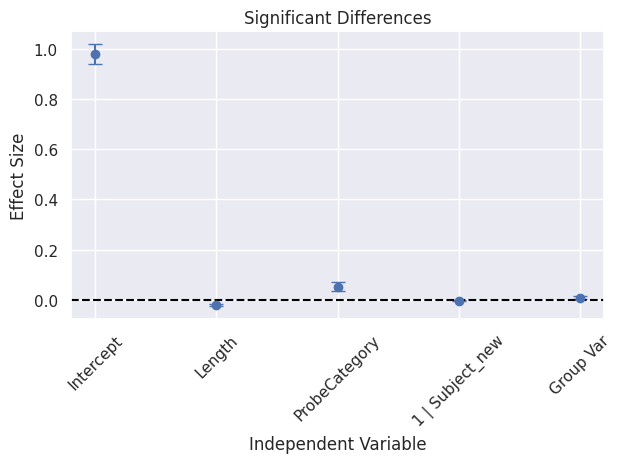

In [ ]:
fixed_effects = result1.params
standard_errors = result1.bse

# Calculate confidence intervals (e.g., 95% confidence intervals)
z_value = 1.96  # For a 95% confidence interval
lower_bound = fixed_effects - z_value * standard_errors
upper_bound = fixed_effects + z_value * standard_errors

# Plotting the significant differences
pl.errorbar(range(len(fixed_effects)), fixed_effects, yerr=z_value * standard_errors, fmt='o', capsize=5)
pl.xticks(range(len(fixed_effects)), fixed_effects.index, rotation = 45)  # Set x-axis labels
pl.axhline(0, color='black', linestyle='--')  # Add a horizontal line at y=0
pl.xlabel('Independent Variable')
pl.ylabel('Effect Size')
pl.title('Significant Differences')
pl.tight_layout()
pl.show()

##RT model

In [175]:
environ_no = environ_[environ_['Resp'] != 'None']

In [168]:
environ_no.head()

,Subject,block,StimulusCategory,ReactionTime,Resp,RespCorrect,ProbeCategory,Trial,Length,Words,Nonwords,Environment,Patient
0,E32,1,nonwords,1.160933,No,1,0,0,3,0,1,0,0
1,E32,1,environment,0.962195,Yes,1,1,1,3,0,0,1,0
2,E32,1,words,0.847072,Yes,1,1,2,3,1,0,0,0
3,E32,1,nonwords,1.023422,Yes,1,1,3,7,0,1,0,0
4,E32,1,nonwords,1.607325,Yes,1,1,4,3,0,1,0,0


In [180]:
formula1 = 'ReactionTime ~ ProbeCategory + Length + (1 | Subject_new)'
formula2 = 'ReactionTime ~ ProbeCategory + Length + Environment + (1 | Subject_new)'

In [181]:
envir_fit1 = smf.mixedlm(formula1, data=environ_no, groups=environ_no['Subject_new'])
result1 = envir_fit1.fit()

In [182]:
envir_fit2 = smf.mixedlm(formula2, data=environ_no, groups=environ_no['Subject_new'])
result2 = envir_fit2.fit()

In [183]:
log_likelihood1 = result1.llf
log_likelihood2 = result2.llf

In [184]:
LRT = -2 * (log_likelihood1 - log_likelihood2)
print(LRT)

0.48562666591169545


In [ ]:
print(result1.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ReactionTime
No. Observations: 5854    Method:             REML        
No. Groups:       32      Scale:              0.0697      
Min. group size:  151     Log-Likelihood:     -607.3920   
Max. group size:  216     Converged:          Yes         
Mean group size:  182.9                                   
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        0.932    0.084 11.158 0.000  0.768  1.096
ProbeCategory   -0.049    0.007 -7.063 0.000 -0.062 -0.035
Length           0.015    0.002  9.703 0.000  0.012  0.018
Words           -0.028    0.007 -3.853 0.000 -0.042 -0.014
1 | Subject_new  0.004    0.004  0.941 0.346 -0.005  0.013
Group Var        0.054    0.054                           



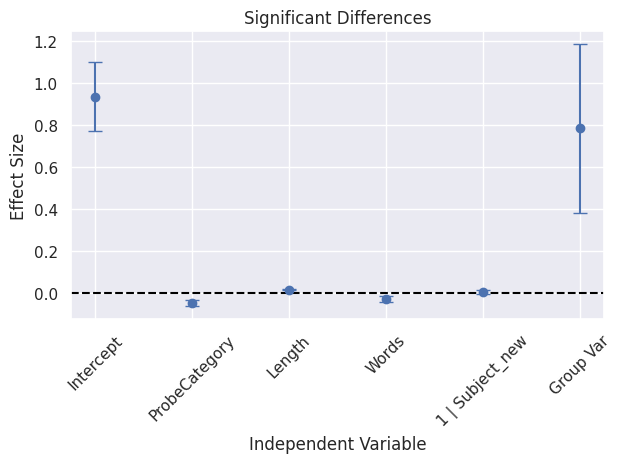

In [ ]:
fixed_effects = result1.params
standard_errors = result1.bse

# Calculate confidence intervals (e.g., 95% confidence intervals)
z_value = 1.96  # For a 95% confidence interval
lower_bound = fixed_effects - z_value * standard_errors
upper_bound = fixed_effects + z_value * standard_errors

# Plotting the significant differences
pl.errorbar(range(len(fixed_effects)), fixed_effects, yerr=z_value * standard_errors, fmt='o', capsize=5)
pl.xticks(range(len(fixed_effects)), fixed_effects.index, rotation = 45)  # Set x-axis labels
pl.axhline(0, color='black', linestyle='--')  # Add a horizontal line at y=0
pl.xlabel('Independent Variable')
pl.ylabel('Effect Size')
pl.title('Significant Differences')
pl.tight_layout()
pl.show()

**srdRT**

In [252]:
id_mapping = {id: i for i, id in enumerate(environ_rt['Subject'].unique())}

# Replace the string IDs with integers in the 'Subject' column
environ_rt['Subject_new'] = environ_rt['Subject'].map(id_mapping)

In [291]:
formula1 = 'stdRT ~ ProbeCategory + Length + Words + (1 | Subject_new)'
formula2 = 'stdRT ~ ProbeCategory + Length + Words + Length:Words + (1 | Subject_new)'

In [292]:
envir_fit1 = smf.mixedlm(formula1, data=environ_rt, groups=environ_rt['Subject_new'])
result1 = envir_fit1.fit()

In [293]:
envir_fit2 = smf.mixedlm(formula2, data=environ_rt, groups=environ_rt['Subject_new'])
result2 = envir_fit2.fit()

In [294]:
log_likelihood1 = result1.llf
log_likelihood2 = result2.llf

In [295]:
LRT = -2 * (log_likelihood1 - log_likelihood2)
print(LRT)

-9.530763831986405


In [296]:
print(result1.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  stdRT   
No. Observations:   6000     Method:              REML    
No. Groups:         33       Scale:               0.0573  
Min. group size:    146      Log-Likelihood:      -36.5793
Max. group size:    216      Converged:           Yes     
Mean group size:    181.8                                 
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       -0.141    0.081 -1.751 0.080 -0.299  0.017
ProbeCategory   -0.044    0.006 -7.060 0.000 -0.056 -0.032
Length           0.016    0.001 11.221 0.000  0.013  0.018
Words           -0.026    0.007 -4.028 0.000 -0.039 -0.014
1 | Subject_new  0.006    0.004  1.314 0.189 -0.003  0.014
Group Var        0.053    0.056                           



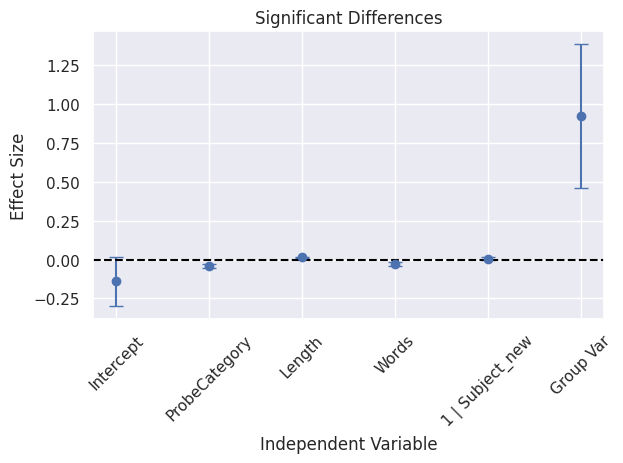

In [297]:
fixed_effects = result1.params
standard_errors = result1.bse

# Calculate confidence intervals (e.g., 95% confidence intervals)
z_value = 1.96  # For a 95% confidence interval
lower_bound = fixed_effects - z_value * standard_errors
upper_bound = fixed_effects + z_value * standard_errors

# Plotting the significant differences
pl.errorbar(range(len(fixed_effects)), fixed_effects, yerr=z_value * standard_errors, fmt='o', capsize=5)
pl.xticks(range(len(fixed_effects)), fixed_effects.index, rotation = 45)  # Set x-axis labels
pl.axhline(0, color='black', linestyle='--')  # Add a horizontal line at y=0
pl.xlabel('Independent Variable')
pl.ylabel('Effect Size')
pl.title('Significant Differences')
pl.tight_layout()
pl.show()

## Only patients

In [298]:
patients = ieeg_.copy()

**Accuracy**

In [371]:
id_mapping = {id: i for i, id in enumerate(patients['Subject'].unique())}

# Replace the string IDs with integers in the 'Subject' column
patients['Subject_new'] = patients['Subject'].map(id_mapping)

In [375]:
formula1 = 'RespCorrect ~ Length + (1 | Subject_new)'
formula2 = 'RespCorrect ~ Length + ProbeCategory + Length*ProbeCategory + (1 | Subject_new)'

In [376]:
envir_fit1 = smf.mixedlm(formula1, data=patients, groups=patients['Subject_new'])
result1 = envir_fit1.fit(maxiter=1000)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [62]:
envir_fit2 = smf.mixedlm(formula2, data=patients, groups=patients['Subject_new'])
result2 = envir_fit2.fit(method='bfgs')

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [63]:
log_likelihood1 = result1.llf
log_likelihood2 = result2.llf

In [64]:
# Here, log-likelihood1 represents the log-likelihood of the first model, and log-likelihood2 represents the log-likelihood of the second model.
# The likelihood ratio test statistic follows a chi-square distribution with degrees of freedom equal to the difference in the number of parameters between the two models.
LRT = -2 * (log_likelihood1 - log_likelihood2)
print(LRT)

-8.216591915424942


In [66]:
print(result1.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: RespCorrect
No. Observations:  3184    Method:             REML       
No. Groups:        19      Scale:              0.1555     
Min. group size:   160     Log-Likelihood:     -1579.7245 
Max. group size:   168     Converged:          Yes        
Mean group size:   167.6                                  
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        0.909    0.030 29.891 0.000  0.850  0.969
Length          -0.020    0.003 -6.525 0.000 -0.027 -0.014
ProbeCategory    0.066    0.014  4.715 0.000  0.039  0.093
1 | Subject_new -0.002    0.002 -1.008 0.314 -0.006  0.002
Group Var        0.002    0.002                           



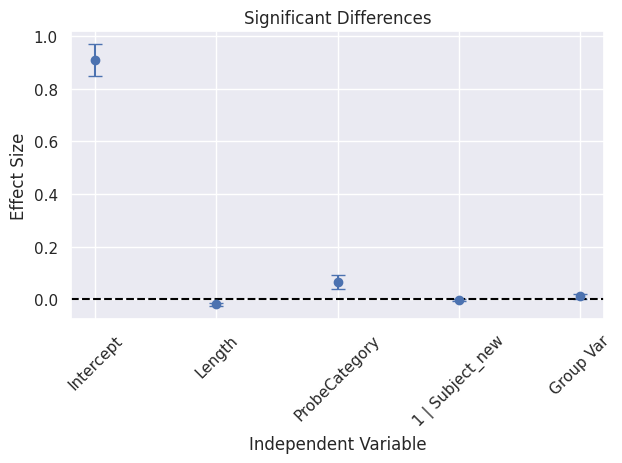

In [65]:
fixed_effects = result1.params
standard_errors = result1.bse

# Calculate confidence intervals (e.g., 95% confidence intervals)
z_value = 1.96  # For a 95% confidence interval
lower_bound = fixed_effects - z_value * standard_errors
upper_bound = fixed_effects + z_value * standard_errors

# Plotting the significant differences
pl.errorbar(range(len(fixed_effects)), fixed_effects, yerr=z_value * standard_errors, fmt='o', capsize=5)
pl.xticks(range(len(fixed_effects)), fixed_effects.index, rotation = 45)  # Set x-axis labels
pl.axhline(0, color='black', linestyle='--')  # Add a horizontal line at y=0
pl.xlabel('Independent Variable')
pl.ylabel('Effect Size')
pl.title('Significant Differences')
pl.tight_layout()
pl.show()

**Reaction Time**

In [301]:
patients_rt = ieeg_rt.copy()

In [156]:
formula1 = 'ReactionTime ~ ProbeCategory + Length + Environment + (1 | Subject_new)'
formula2 = 'ReactionTime ~ ProbeCategory + Length + Environment + Length:Environment + (1 | Subject_new)'

In [157]:
envir_fit1 = smf.mixedlm(formula1, data=patients_rt, groups=patients_rt['Subject_new'])
result1 = envir_fit1.fit()

In [158]:
envir_fit2 = smf.mixedlm(formula2, data=patients_rt, groups=patients_rt['Subject_new'])
result2 = envir_fit2.fit()

In [159]:
log_likelihood1 = result1.llf
log_likelihood2 = result2.llf

In [160]:
LRT = -2 * (log_likelihood1 - log_likelihood2)
print(LRT)

-8.245259403178352


In [161]:
print(result1.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ReactionTime
No. Observations: 3055    Method:             REML        
No. Groups:       19      Scale:              0.0839      
Min. group size:  146     Log-Likelihood:     -610.3154   
Max. group size:  168     Converged:          Yes         
Mean group size:  160.8                                   
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        0.997    0.118  8.474 0.000  0.766  1.227
ProbeCategory   -0.030    0.010 -2.852 0.004 -0.050 -0.009
Length           0.014    0.002  5.851 0.000  0.009  0.018
Environment      0.041    0.011  3.671 0.000  0.019  0.063
1 | Subject_new  0.004    0.011  0.424 0.672 -0.016  0.025
Group Var        0.064    0.077                           



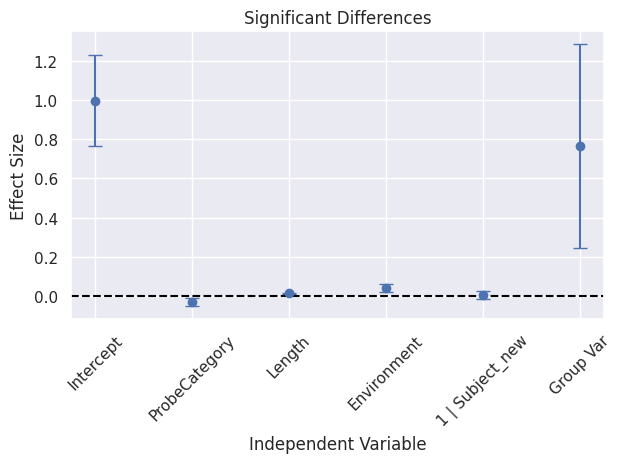

In [162]:
fixed_effects = result1.params
standard_errors = result1.bse

# Calculate confidence intervals (e.g., 95% confidence intervals)
z_value = 1.96  # For a 95% confidence interval
lower_bound = fixed_effects - z_value * standard_errors
upper_bound = fixed_effects + z_value * standard_errors

# Plotting the significant differences
pl.errorbar(range(len(fixed_effects)), fixed_effects, yerr=z_value * standard_errors, fmt='o', capsize=5)
pl.xticks(range(len(fixed_effects)), fixed_effects.index, rotation = 45)  # Set x-axis labels
pl.axhline(0, color='black', linestyle='--')  # Add a horizontal line at y=0
pl.xlabel('Independent Variable')
pl.ylabel('Effect Size')
pl.title('Significant Differences')
pl.tight_layout()
pl.show()

**stdRT**

In [304]:
id_mapping = {id: i for i, id in enumerate(patients_rt['Subject'].unique())}

# Replace the string IDs with integers in the 'Subject' column
patients_rt['Subject_new'] = patients_rt['Subject'].map(id_mapping)

In [359]:
formula1 = 'stdRT ~ ProbeCategory + Length + Words + (1 | Subject_new)'
formula2 = 'stdRT ~ ProbeCategory + Length + Words + Length:Words + (1 | Subject_new)'

In [360]:
envir_fit1 = smf.mixedlm(formula1, data=patients_rt, groups=patients_rt['Subject_new'])
result1 = envir_fit1.fit()

In [361]:
envir_fit2 = smf.mixedlm(formula2, data=patients_rt, groups=patients_rt['Subject_new'])
result2 = envir_fit2.fit()

In [362]:
log_likelihood1 = result1.llf
log_likelihood2 = result2.llf

In [363]:
LRT = -2 * (log_likelihood1 - log_likelihood2)
print(LRT)

-8.986140452372638


In [364]:
print(result1.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  stdRT    
No. Observations:  3055     Method:              REML     
No. Groups:        19       Scale:               0.0647   
Min. group size:   146      Log-Likelihood:      -215.7915
Max. group size:   168      Converged:           Yes      
Mean group size:   160.8                                  
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       -0.013    0.109 -0.119 0.905 -0.227  0.201
ProbeCategory   -0.030    0.009 -3.217 0.001 -0.048 -0.012
Length           0.013    0.002  6.331 0.000  0.009  0.017
Words           -0.038    0.010 -3.952 0.000 -0.058 -0.019
1 | Subject_new  0.004    0.010  0.358 0.721 -0.016  0.023
Group Var        0.055    0.076                           



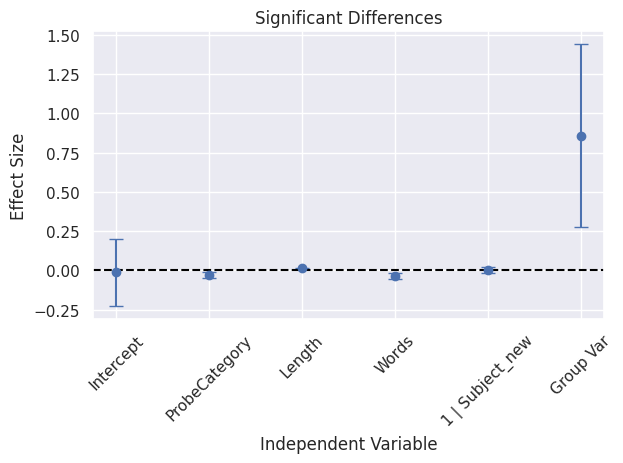

In [365]:
fixed_effects = result1.params
standard_errors = result1.bse

# Calculate confidence intervals (e.g., 95% confidence intervals)
z_value = 1.96  # For a 95% confidence interval
lower_bound = fixed_effects - z_value * standard_errors
upper_bound = fixed_effects + z_value * standard_errors

# Plotting the significant differences
pl.errorbar(range(len(fixed_effects)), fixed_effects, yerr=z_value * standard_errors, fmt='o', capsize=5)
pl.xticks(range(len(fixed_effects)), fixed_effects.index, rotation = 45)  # Set x-axis labels
pl.axhline(0, color='black', linestyle='--')  # Add a horizontal line at y=0
pl.xlabel('Independent Variable')
pl.ylabel('Effect Size')
pl.title('Significant Differences')
pl.tight_layout()
pl.show()

# Other

In [ ]:
pl.figure()
subset = combined.groupby(['StimulusCategory', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.StimulusCategory.unique():
  x = subset[subset['StimulusCategory'] == i]
  pl.plot(x.Length, x.RespCorrect)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend(subset.StimulusCategory.unique())
pl.title('Acc across conditions and line length Combined');

pl.figure()
subset = combined.groupby(['ProbeCategory', 'Length'])[['RespCorrect']].mean().reset_index()
for i in subset.ProbeCategory.unique():
  x = subset[subset['ProbeCategory'] == i]
  if i == 1:
    name = 'match'
  elif i == 0:
    name = 'mismatch'
  pl.plot(x.Length, x.RespCorrect, label = name)
pl.xticks(x.Length)
pl.xlabel('List length')
pl.ylabel('Acc')
pl.legend()
pl.title('Acc across probe types and line length Combined');

NameError: ignored

<Figure size 640x480 with 0 Axes>

**Bar plots Accuracy**

Length 3 vs 5
Ttest_indResult(statistic=5.1120885428710725, pvalue=3.411816632272645e-07)
Length 5 vs 7
Ttest_indResult(statistic=-4.911606703658065, pvalue=9.547273356967004e-07)
Length 7 vs 9
Ttest_indResult(statistic=0.28754082878511633, pvalue=0.7737193214608983)


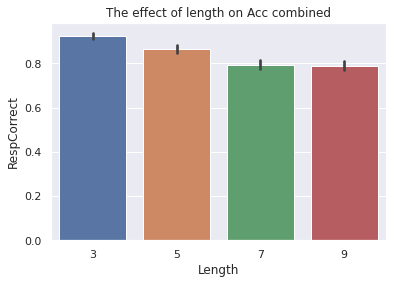

In [ ]:
sns.barplot(x='Length', y='RespCorrect', data=combined)
pl.title('The effect of length on Acc combined');

print('Length 3 vs 5')
x, y = combined[combined['Length'] == 3]['RespCorrect'], combined[combined['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = combined[combined['Length'] == 7]['RespCorrect'], combined[combined['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = combined[combined['Length'] == 7]['RespCorrect'], combined[combined['Length'] == 9]['RespCorrect']
print(ttest(x,y))

Ttest_indResult(statistic=5.864973867685747, pvalue=4.7522307295210785e-09)


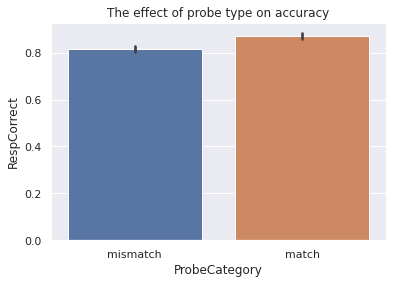

In [ ]:
ax=sns.barplot(x='ProbeCategory', y='RespCorrect', data=combined)
ax.set_xticklabels(['mismatch','match'])
pl.title('The effect of probe type on accuracy');

x,y = combined[combined['ProbeCategory'] == 1]['RespCorrect'], combined[combined['ProbeCategory'] == 0]['RespCorrect']
print(ttest(x,y))

Ttest_indResult(statistic=-6.029504148772898, pvalue=1.7562984940614059e-09)


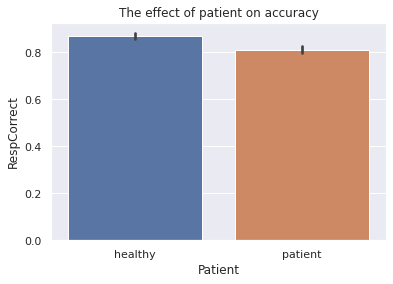

In [ ]:
ax=sns.barplot(x='Patient', y='RespCorrect', data=combined)
ax.set_xticklabels(['healthy','patient'])
pl.title('The effect of patient on accuracy');

x,y = combined[combined['Patient'] == 1]['RespCorrect'], combined[combined['Patient'] == 0]['RespCorrect']
print(ttest(x,y))

W vs NW
Ttest_indResult(statistic=1.4415238697957402, pvalue=0.14951989986684214)
W vs E
Ttest_indResult(statistic=2.674943404674826, pvalue=0.007506744136539974)
E vs NW
Ttest_indResult(statistic=-1.2347694594229524, pvalue=0.2169935351683587)


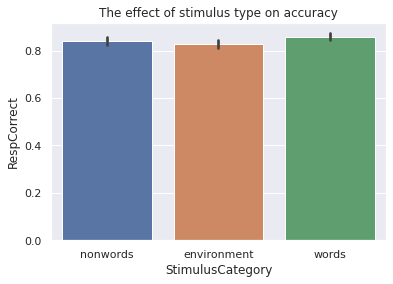

In [ ]:
sns.barplot(x='StimulusCategory', y='RespCorrect', data=combined)
pl.title('The effect of stimulus type on accuracy');

print('W vs NW')
x,y = combined[combined['StimulusCategory'] == 'words']['RespCorrect'], combined[combined['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('W vs E')
x,y = combined[combined['StimulusCategory'] == 'words']['RespCorrect'], combined[combined['StimulusCategory'] == 'environment']['RespCorrect']
print(ttest(x,y))
print('E vs NW')
x,y = combined[combined['StimulusCategory'] == 'environment']['RespCorrect'], combined[combined['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))

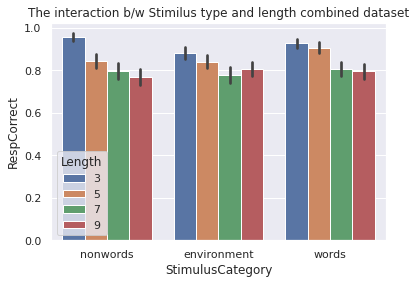

In [ ]:
sns.barplot(x='StimulusCategory', y='RespCorrect', hue='Length', data=combined_data)
pl.title('The interaction b/w Stimilus type and length combined dataset');

In [ ]:
print('Environment')
subset = combined[combined['StimulusCategory'] == 'environment']
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 5]['RespCorrect'], subset[subset['Length'] == 7]['RespCorrect']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 9]['RespCorrect']
print(ttest(x,y))
print('')
print('Words')
subset = combined[combined['StimulusCategory'] == 'words']
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 5]['RespCorrect'], subset[subset['Length'] == 7]['RespCorrect']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 9]['RespCorrect']
print(ttest(x,y))
print('')
print('Environment')
subset = combined[combined['StimulusCategory'] == 'environment']
print('Length 3 vs 5')
x, y = subset[subset['Length'] == 3]['RespCorrect'], subset[subset['Length'] == 5]['RespCorrect']
print(ttest(x,y))
print('Length 5 vs 7')
x, y = subset[subset['Length'] == 5]['RespCorrect'], subset[subset['Length'] == 7]['RespCorrect']
print(ttest(x,y))
print('Length 7 vs 9')
x, y = subset[subset['Length'] == 7]['RespCorrect'], subset[subset['Length'] == 9]['RespCorrect']
print(ttest(x,y))
print('')

print('Length 3')
subset = combined[combined['Length'] == 3]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'environment']['RespCorrect']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('')
print('Length 5')
subset = combined[combined['Length'] == 5]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'environment']['RespCorrect']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('')
print('Length 7')
subset = combined[combined['Length'] == 7]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'environment']['RespCorrect']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('')
print('Length 9')
subset = combined[combined['Length'] == 9]
print('W vs NW')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
print('W vs E')
x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'environment']['RespCorrect']
print(ttest(x,y))
print('E vs NW')
x, y = subset[subset['StimulusCategory'] == 'environment']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))

Environment
Length 3 vs 5
Ttest_indResult(statistic=1.8785077111816955, pvalue=0.06062701112520789)
Length 5 vs 7
Ttest_indResult(statistic=2.3980133768151215, pvalue=0.016681498791376762)
Length 7 vs 9
Ttest_indResult(statistic=-1.0119169040671612, pvalue=0.31183922853155155)

Words
Length 3 vs 5
Ttest_indResult(statistic=1.1721119116234855, pvalue=0.2414519924722963)
Length 5 vs 7
Ttest_indResult(statistic=4.503383057154586, pvalue=7.605825661379209e-06)
Length 7 vs 9
Ttest_indResult(statistic=0.38998626212213483, pvalue=0.6966347976677277)

Environment
Length 3 vs 5
Ttest_indResult(statistic=1.8785077111816955, pvalue=0.06062701112520789)
Length 5 vs 7
Ttest_indResult(statistic=2.3980133768151215, pvalue=0.016681498791376762)
Length 7 vs 9
Ttest_indResult(statistic=-1.0119169040671612, pvalue=0.31183922853155155)

Length 3
W vs NW
Ttest_indResult(statistic=-1.94902399808226, pvalue=0.051606620889538324)
W vs E
Ttest_indResult(statistic=2.3739465091317684, pvalue=0.017809221168635113

**Model**

In [ ]:
combined.columns

Index(['block', 'StimulusCategory', 'ReactionTime', 'Resp', 'RespCorrect',
       'stimulusSounds_idx', 'ProbeCategory', 'probeSound_idx', 'Trial',
       'Subject', 'Length', 'Words', 'Nonwords', 'Environment', 'Patient'],
      dtype='object')

In [ ]:
combined_data = combined[[
    'block', 'StimulusCategory', 'ReactionTime', 'Resp', 'RespCorrect',
       'ProbeCategory', 'Trial', 'Subject', 'Length',
       'Words', 'Nonwords', 'Environment', 'Patient'
]]

In [ ]:
%%R -i combined_data
comp1<-lmer('RespCorrect ~ Patient + ProbeCategory + StimulusCategory + Length + StimulusCategory:Length + (1|Subject)', data=combined_data)
comp2<-lmer('RespCorrect ~ Patient + ProbeCategory + StimulusCategory + Length + StimulusCategory:Length + ProbeCategory:StimulusCategory + (1|Subject)', data=combined_data)
anova(comp1, comp2)

  npar      AIC      BIC    logLik deviance    Chisq Df Pr..Chisq.
1   10 4426.047 4492.450 -2203.024 4406.047       NA NA         NA
2   12 4424.987 4504.671 -2200.494 4400.987 5.059787  2 0.07966751


In [ ]:
model = Lmer(
    'RespCorrect ~ Patient + ProbeCategory + StimulusCategory + Length + StimulusCategory:Length + (1|Subject)',
    data = combined_data
)
model.fit()

Formula: RespCorrect~Patient+ProbeCategory+StimulusCategory+Length+StimulusCategory:Length+(1|Subject)

Family: gaussian	 Inference: parametric

Number of observations: 5655	 Groups: {'Subject': 30.0}

Log-likelihood: -2235.452 	 AIC: 4470.904

Random effects:

                 Name    Var    Std
Subject   (Intercept)  0.001  0.029
Residual               0.127  0.357

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.913,0.863,0.964,0.026,916.953,35.634,0.000,***
Patient,-0.059,-0.086,-0.031,0.014,27.142,-4.146,0.000,***
ProbeCategory,0.057,0.038,0.075,0.009,5618.464,5.977,0.000,***
StimulusCategorynonwords,0.111,0.045,0.176,0.033,5618.652,3.317,0.001,***
StimulusCategorywords,0.095,0.029,0.160,0.033,5618.621,2.845,0.004,**
Length,-0.015,-0.022,-0.007,0.004,5618.664,-3.959,0.000,***
StimulusCategorynonwords:Length,-0.016,-0.026,-0.006,0.005,5618.696,-3.050,0.002,**
StimulusCategorywords:Length,-0.010,-0.021,-0.000,0.005,5618.584,-2.014,0.044,*


# Linear regression for RT

In [ ]:
environ_.head()

,Subject,block,StimulusCategory,ReactionTime,Resp,RespCorrect,ProbeCategory,Trial,Length,Words,Nonwords,Environment,Patient
0,E32,1,nonwords,1.160933,No,1,0,0,3,0,1,0,0
1,E32,1,environment,0.962195,Yes,1,1,1,3,0,0,1,0
2,E32,1,words,0.847072,Yes,1,1,2,3,1,0,0,0
3,E32,1,nonwords,1.023422,Yes,1,1,3,7,0,1,0,0
4,E32,1,nonwords,1.607325,Yes,1,1,4,3,0,1,0,0


In [ ]:
subset = environ_[environ_['Resp'] != 'None']
X = subset[['ProbeCategory', 'Patient', 'Words', 'Nonwords', 'Length']]
y = subset['ReactionTime']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3214, 5)
(2144, 5)
(3214,)
(2144,)


In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(model.intercept_)

0.9315485604753947


In [ ]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
ProbeCategory,-0.048174
Patient,0.160468
Words,-0.027088
Nonwords,-0.007768
Length,0.015866


In [ ]:
predictions = model.predict(X_test)
predictions

array([1.06435443, 1.16357997, 1.1595517 , ..., 1.20308039, 1.19531239,
       0.96270609])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


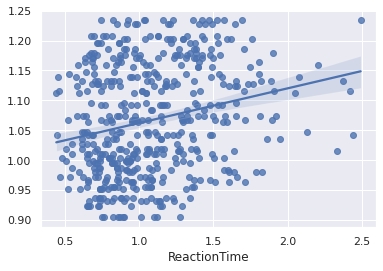

In [ ]:
sns.regplot(y_test[:500],predictions[:500])

In [ ]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:           ReactionTime   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     45.49
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.60e-45
Time:                        15:50:26   Log-Likelihood:                -1119.9
No. Observations:                3214   AIC:                             2252.
Df Residuals:                    3208   BIC:                             2288.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9315      0.021     44.238

# Additional looking aspects

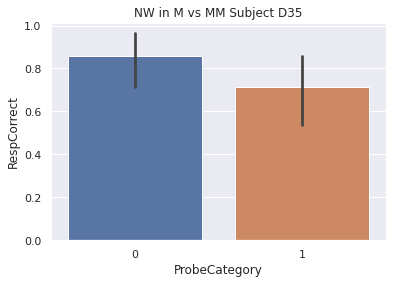

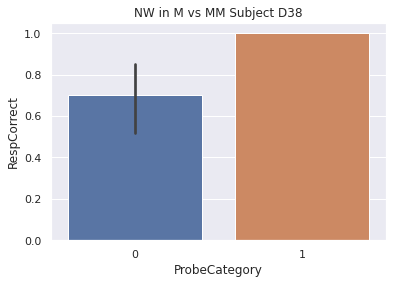

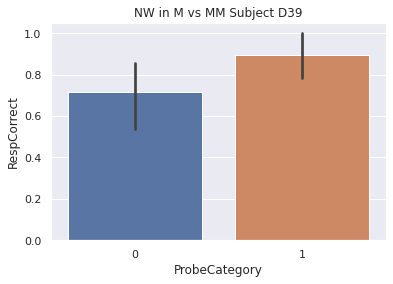

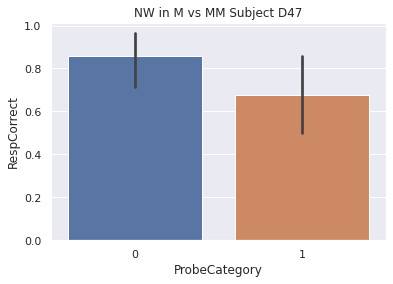

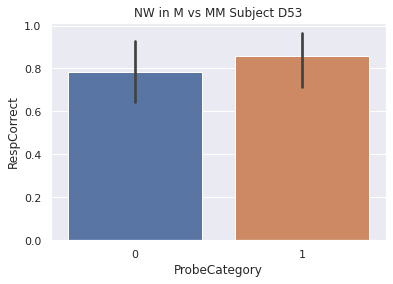

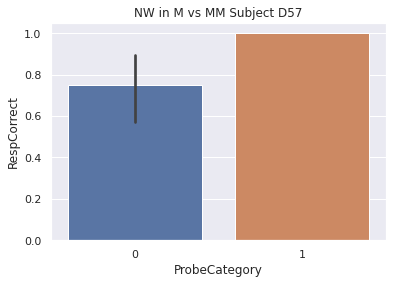

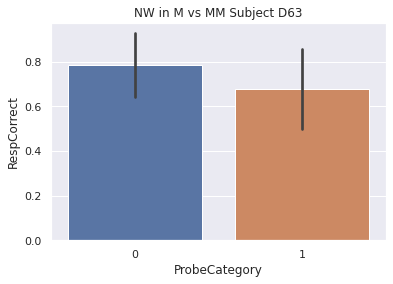

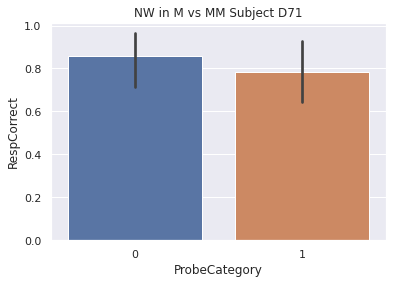

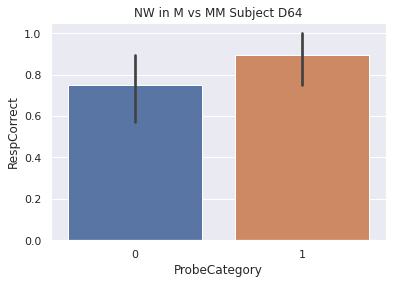

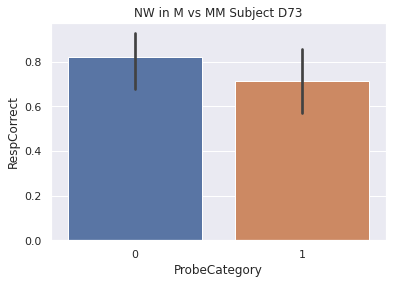

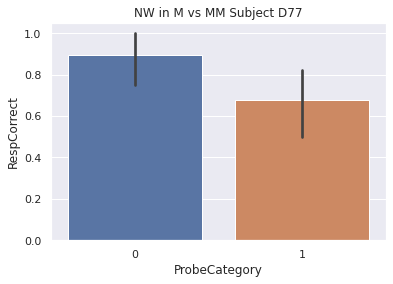

In [ ]:
subjs = ieeg_.Subject.unique()
for i in subjs:
  subset = ieeg_[(ieeg_['Subject'] == i) & (ieeg_['StimulusCategory'] == 'nonwords')]
  x, y = subset[subset['ProbeCategory'] == 0]['RespCorrect'], subset[subset['ProbeCategory'] == 1]['RespCorrect']
  difference = ttest(x, y)[1]
  if difference < 0.5:
    pl.figure()
    sns.barplot(x = 'ProbeCategory', y = 'RespCorrect', data = subset)
    pl.title('NW in M vs MM Subject ' + i);

In [ ]:
ieeg_.columns

Index(['block', 'ReactionTime', 'Resp', 'RespCorrect', 'stimulusSounds_idx',
       'ProbeCategory', 'probeSound_idx', 'StimulusCategory', 'Trial',
       'stimulusSounds_name', 'probeSound_name', 'Subject', 'Length', 'Words',
       'Nonwords', 'Environment', 'ProbeFreq', 'ProbeImag', 'StimFreq',
       'StimImag', 'ProbeFreqLog'],
      dtype='object')

In [ ]:
ieeg_[ieeg_['StimulusCategory'] == 'words']['probeSound_name'].unique()

array(['chalice', 'chapter', 'porridge', 'cherub', 'cushion', 'quota',
       'glacier', 'drama', 'kitchen', 'pleasure', 'duty', 'tunic', 'menu',
       'vision', 'topic', 'rhythm', 'comic', 'medic', 'madam', 'creature',
       'rabbit', 'vermin', 'bounty', 'member'], dtype=object)

In [ ]:
ieeg_[ieeg_['StimulusCategory'] == 'nonwords']['probeSound_name'].unique()

array(['yehbahl', 'haasahp', 'zerlaht', 'puwgahl', 'gowmaht', 'shahnahl',
       'hermahk', 'chuwpahl', 'jihnsiy', 'kaagaht', 'ferdahn', 'mahtern',
       'tehlper', 'tehsahf', 'prehjiy', 'saechahn', 'raedaht', 'nahlaht',
       'viylahs', 'baeverd', 'drahjer', 'gyuwtiy', 'thowster', 'wiykaan'],
      dtype=object)

In [ ]:
x, y = ieeg_[ieeg_['StimulusCategory'] == 'words']['RespCorrect'], ieeg_[ieeg_['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))
x, y = ieeg_[ieeg_['StimulusCategory'] == 'words']['RespCorrect'], ieeg_[ieeg_['StimulusCategory'] == 'environment']['RespCorrect']
print(ttest(x,y))
x, y = ieeg_[ieeg_['StimulusCategory'] == 'environment']['RespCorrect'], ieeg_[ieeg_['StimulusCategory'] == 'nonwords']['RespCorrect']
print(ttest(x,y))

Ttest_indResult(statistic=1.2107937546803083, pvalue=0.22613508282223482)
Ttest_indResult(statistic=2.3921243179621885, pvalue=0.016854126603917986)
Ttest_indResult(statistic=-1.1817970473197625, pvalue=0.23744392967944108)


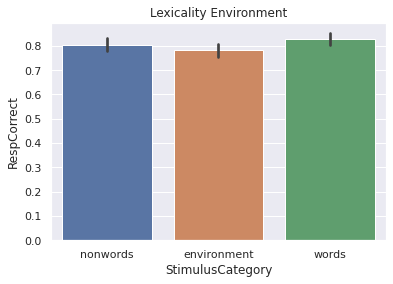

In [ ]:
ax = sns.barplot(x = 'StimulusCategory', y = 'RespCorrect', data = ieeg_)
pl.title('Lexicality Environment');

In [ ]:
m = ieeg_.Subject.unique()
print(m)

['D32' 'D35' 'D38' 'D39' 'D42' 'D47' 'D53' 'D55' 'D57' 'D63' 'D69' 'D71'
 'D64' 'D65' 'D73' 'D77']


In [ ]:
x = ['D23', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D34', 'D35',
       'D36', 'D38', 'D39', 'D41', 'D42', 'D47', 'D48', 'D53', 'D55',
       'D57', 'D59', 'D63', 'D68', 'D69', 'D70', 'D71', 'D72', 'D73',
       'D77']

In [ ]:
same = []
for i in x:
  for j in m:
    if i == j:
      if i not in same:
        same.append(i)

ForD35 Ttest_indResult(statistic=1.8552331837340819, pvalue=0.06624043887112614)
ForD38 Ttest_indResult(statistic=-0.5554304826409888, pvalue=0.5797973780729029)
ForD39 Ttest_indResult(statistic=-1.3076102475835427, pvalue=0.1937319174736203)
ForD42 Ttest_indResult(statistic=0.8801408338010143, pvalue=0.3807018601175056)
ForD47 Ttest_indResult(statistic=1.771261989023698, pvalue=0.07928662500569843)
ForD53 Ttest_indResult(statistic=0.5105521590484214, pvalue=0.6106877464068676)
ForD55 Ttest_indResult(statistic=0.5359162866703508, pvalue=0.5930984145686597)
ForD57 Ttest_indResult(statistic=0.0, pvalue=1.0)
ForD63 Ttest_indResult(statistic=0.8903891243679892, pvalue=0.3752002621339706)
ForD69 Ttest_indResult(statistic=0.4149023679865858, pvalue=0.6790214660825205)
ForD71 Ttest_indResult(statistic=-0.4718814096542984, pvalue=0.6379461481094102)
ForD73 Ttest_indResult(statistic=0.45686831007569667, pvalue=0.6486666289912741)
ForD77 Ttest_indResult(statistic=-0.22493993883024954, pvalue=0.8

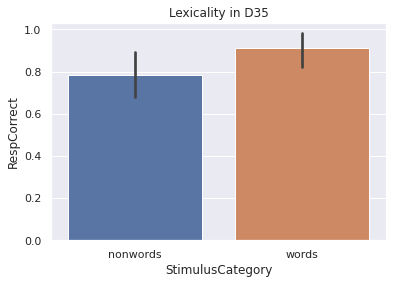

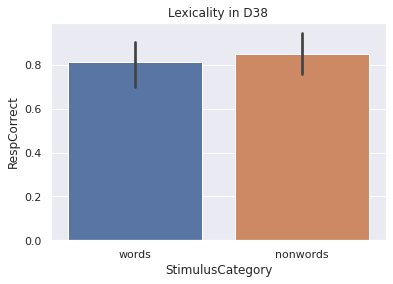

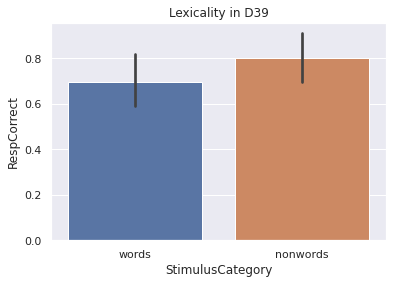

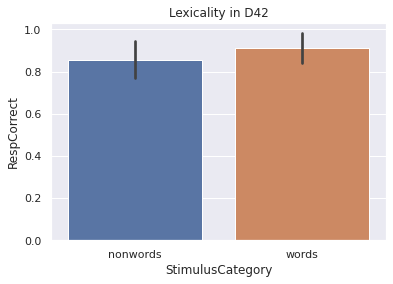

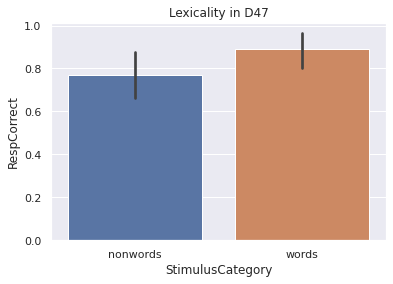

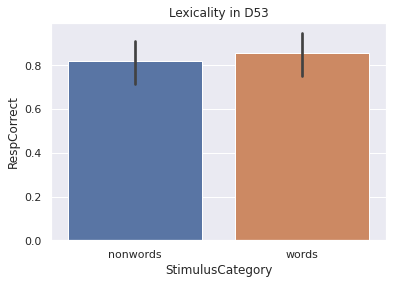

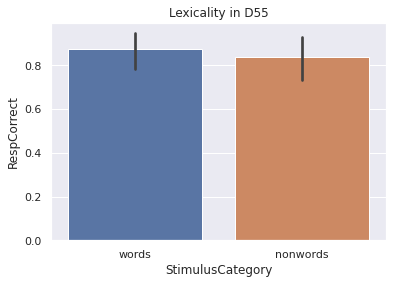

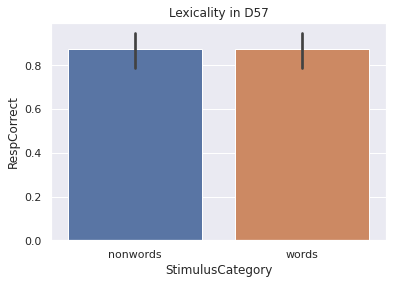

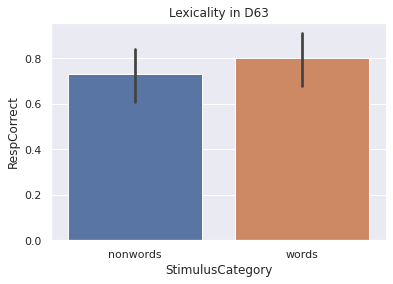

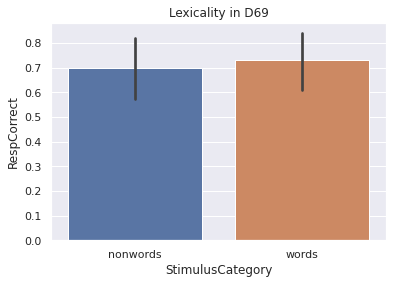

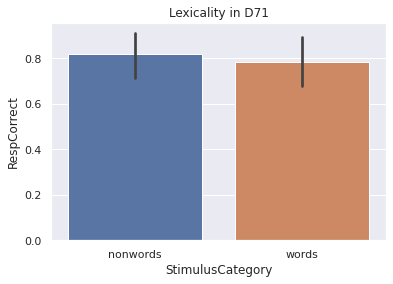

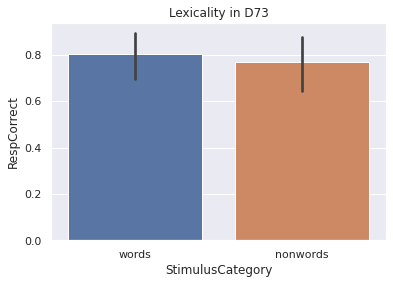

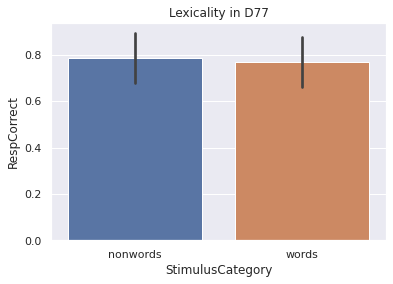

In [ ]:
for i in same:
  pl.figure()
  subset = ieeg_[ieeg_['Subject'] == i]
  sns.barplot(x = 'StimulusCategory', y = 'RespCorrect', data = subset[subset['StimulusCategory'] != 'environment'])
  pl.title('Lexicality in ' + i)
  x, y = subset[subset['StimulusCategory'] == 'words']['RespCorrect'], subset[subset['StimulusCategory'] == 'nonwords']['RespCorrect']
  print('For' + i, ttest(x, y))

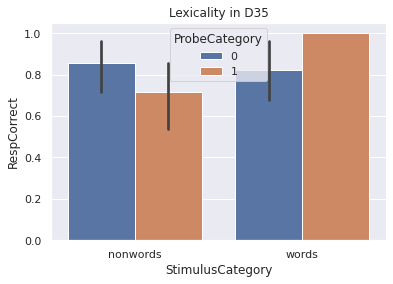

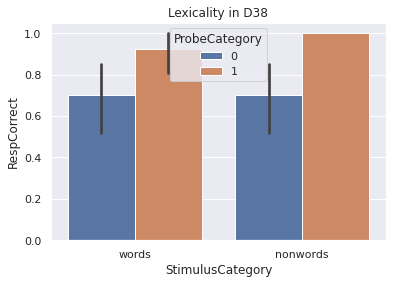

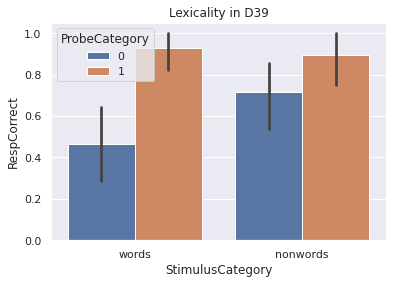

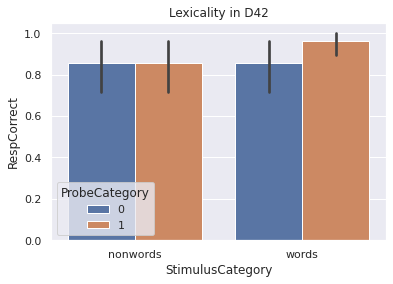

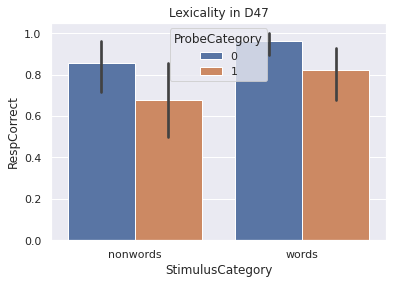

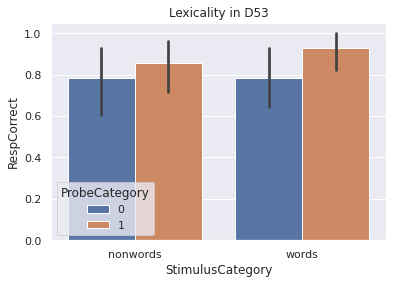

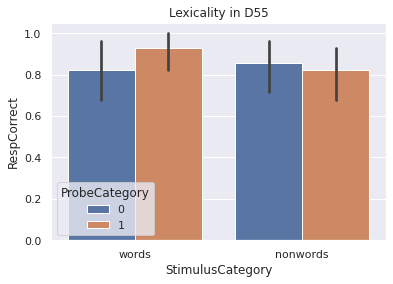

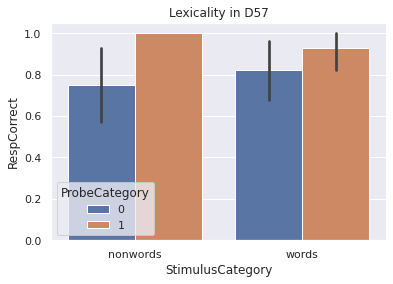

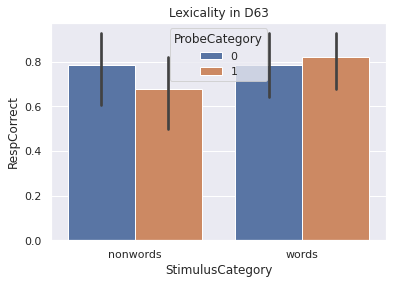

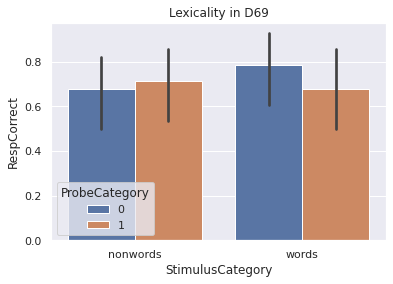

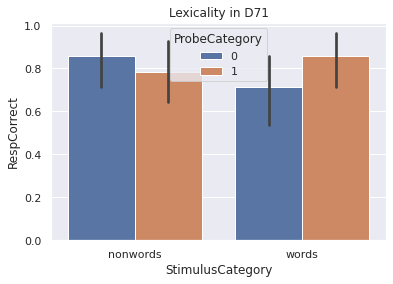

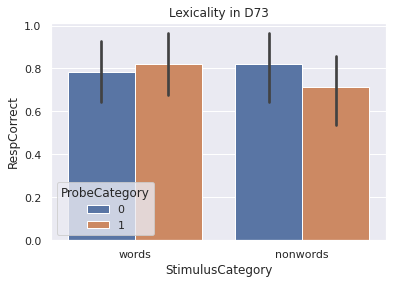

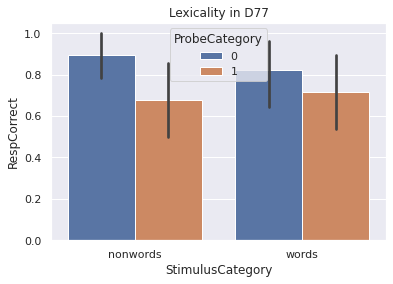

In [ ]:
for i in same:
  pl.figure()
  subset = ieeg_[ieeg_['Subject'] == i]
  sns.barplot(x = 'StimulusCategory', y = 'RespCorrect', hue = 'ProbeCategory', data = subset[subset['StimulusCategory'] != 'environment'])
  pl.title('Lexicality in ' + i)